- causal structure generation from R
- equation using do-calc
- use estimation from causal dag and equations

In [1]:
import pandas as pd
import numpy as np
import csv

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
data = pd.read_csv("delirium_data_cleaned.csv")
data.columns

Index(['subject_id', 'hadm_id', 'icustay_id', 'sex', 'age', 'race',
       'icd9_codes', 'sofa', 'apsiii', 'surgery', 'pneumonia', 'sepsis',
       'dementia', 'alzheimers', 'depression', 'anxiety', 'met_acidosis',
       'airway_obs', 'copd', 'liver_disease', 'heart_disease', 'mechvent',
       'mechvent_count', 'drug_group', 'drug_categories_distinct_count',
       'drug_timelength', 'death_hosp', 'death_timeline', 'los_days',
       'time_to_mechvent', 'time_in_mechvent'],
      dtype='object')

In [4]:
data.sample(5)

,subject_id,hadm_id,icustay_id,sex,age,race,icd9_codes,sofa,apsiii,surgery,pneumonia,sepsis,dementia,alzheimers,depression,anxiety,met_acidosis,airway_obs,copd,liver_disease,heart_disease,mechvent,mechvent_count,drug_group,drug_categories_distinct_count,drug_timelength,death_hosp,death_timeline,los_days,time_to_mechvent,time_in_mechvent
519,26159,181374,230196,M,68.86,0,"41071: Subendo infarct, initial\n4280: CHF NOS...",9,49,0,0,0,0,0,1,0,0,0,0,0,1,1,1,HL,2,1833,0,4,19.4858,6.801389,188.333333
91,4199,101689,208387,M,73.32,1,80502: Fx c2 vertebra-closed\nE8888: Fall NEC\...,2,32,0,0,0,0,0,0,0,0,0,1,0,1,0,0,HL,1,2085,0,4,1.2078,-1.000000,-1.000000
1516,89446,197193,245054,M,72.62,1,0389: Septicemia NOS\n56721: Peritonitis (acut...,11,43,1,0,1,0,0,0,0,0,0,0,0,1,1,1,OD,3,13,0,-1,4.1740,0.174306,68.000000
157,7219,126758,296514,M,70.08,1,41401: Crnry athrscl natve vssl\n4139: Angina ...,8,34,0,0,0,0,0,0,1,0,0,0,0,1,1,1,HL,1,15,0,-1,4.2272,0.174306,53.566667
1331,76751,114622,222749,F,78.18,1,4589: Hypotension NOS\n0389: Septicemia NOS\n5...,6,59,0,0,0,0,0,0,0,0,1,1,0,0,0,0,ND,0,6,1,1,6.4095,-1.000000,-1.000000


In [5]:
data = data.drop(['subject_id', 'hadm_id', 'icustay_id', 'icd9_codes'], axis=1)

In [6]:
data.shape

(1671, 27)

In [7]:
def label_sex(row):
    if row['sex'] == 'F':
        return 1
    else:
        return 0
    return 1

In [8]:
def label_drug_group(row):
    if row['drug_group'] == 'ND':
        return 0
    elif row['drug_group'] == 'OD':
        return 1
    else:
        return 2
    return 0

In [9]:
data['sex'] = data.apply(lambda row: label_sex(row), axis=1)
data['drug_group'] = data.apply(lambda row: label_drug_group(row), axis=1)

In [10]:
data.sample(5)

,sex,age,race,sofa,apsiii,surgery,pneumonia,sepsis,dementia,alzheimers,depression,anxiety,met_acidosis,airway_obs,copd,liver_disease,heart_disease,mechvent,mechvent_count,drug_group,drug_categories_distinct_count,drug_timelength,death_hosp,death_timeline,los_days,time_to_mechvent,time_in_mechvent
370,0,51.08,2,6,59,1,1,1,0,0,0,0,0,0,0,1,0,1,2,0,0,195,0,3,7.1693,0.399306,10.25
276,0,52.45,1,6,27,1,1,0,0,0,0,0,0,0,0,0,1,1,2,1,2,22,0,-1,10.5540,0.013194,105.70
912,1,84.31,1,7,70,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2,1,22,0,1,2.5369,-1.000000,-1.00
21,0,17.98,1,3,41,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,10,0,-1,4.8538,-1.000000,-1.00
1623,0,50.68,0,4,40,1,1,1,0,0,0,0,0,0,0,0,1,1,5,2,2,22,0,-1,15.9857,0.044444,136.00


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1671 entries, 0 to 1670
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   sex                             1671 non-null   int64  
 1   age                             1671 non-null   float64
 2   race                            1671 non-null   int64  
 3   sofa                            1671 non-null   int64  
 4   apsiii                          1671 non-null   int64  
 5   surgery                         1671 non-null   int64  
 6   pneumonia                       1671 non-null   int64  
 7   sepsis                          1671 non-null   int64  
 8   dementia                        1671 non-null   int64  
 9   alzheimers                      1671 non-null   int64  
 10  depression                      1671 non-null   int64  
 11  anxiety                         1671 non-null   int64  
 12  met_acidosis                    16

In [12]:
data.columns

Index(['sex', 'age', 'race', 'sofa', 'apsiii', 'surgery', 'pneumonia',
       'sepsis', 'dementia', 'alzheimers', 'depression', 'anxiety',
       'met_acidosis', 'airway_obs', 'copd', 'liver_disease', 'heart_disease',
       'mechvent', 'mechvent_count', 'drug_group',
       'drug_categories_distinct_count', 'drug_timelength', 'death_hosp',
       'death_timeline', 'los_days', 'time_to_mechvent', 'time_in_mechvent'],
      dtype='object')

In [13]:
# keeping the colnames saved for later use
with open("graph_output/colnames.csv", 'r') as file_name:
    f = csv.reader(file_name)
    f_list = list(f)

colnames = []
for i in f_list:
    colnames.append(i[0])
colnames.pop(0)
    
print(len(colnames))
print(colnames)

27
['sex', 'age', 'race', 'sofa', 'apsiii', 'surgery', 'pneumonia', 'sepsis', 'dementia', 'alzheimers', 'depression', 'anxiety', 'met_acidosis', 'airway_obs', 'copd', 'liver_disease', 'heart_disease', 'mechvent', 'mechvent_count', 'drug_group', 'drug_categories_distinct_count', 'drug_timelength', 'death_hosp', 'death_timeline', 'los_days', 'time_to_mechvent', 'time_in_mechvent']


# Read SLA outputs

In [14]:
edges = {}
for i in range(len(colnames)):
    for j in range(len(colnames)):
        if (i < j):
            edges[str(colnames[i])+","+str(colnames[j])] = []

In [15]:
def print_with_values_only(edges):
    for key, value in edges.items():
        if (len(value) != 0) and (set(value) != {0}):
            print(key, ":", value)

In [16]:
print_with_values_only(edges)

In [17]:
# GENERAL CODE:
# 0: No edge or tail
# 1: Arrowhead

# CPDAG:
# amat[a,b] = 0 and amat[b,a] = 1 implies a --> b.
# amat[a,b] = 1 and amat[b,a] = 0 implies a <-- b.
# amat[a,b] = 0 and amat[b,a] = 0 implies a b.
# amat[a,b] = 1 and amat[b,a] = 1 implies a --- b.

# PAG:
# amat[a,b] = 2 and amat[b,a] = 3 implies a --> b.
# amat[a,b] = 3 and amat[b,a] = 2 implies a <-- b.
# amat[a,b] = 2 and amat[b,a] = 2 implies a <-> b.
# amat[a,b] = 1 and amat[b,a] = 3 implies a --o b.
# amat[a,b] = 0 and amat[b,a] = 0 implies a b.

### PC

In [18]:
with open("graph_output/1_pc.csv", 'r') as file_name:
    f = csv.reader(file_name)
    pc = list(f)
    
print(pc)
print(pc[11][0])

[['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27'], ['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0'], ['0', '0', '1', '0', '0', '1', '0', '0', '1', '1', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0'], ['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0'], ['0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0'], ['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0'], ['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0'], ['0', '0', '0', '0', '

In [19]:
for i in edges.keys():
    from_node = i.split(',')[0]
    to_node   = i.split(',')[1]
    
    from_index = colnames.index(from_node)
    to_index = colnames.index(to_node)
    
    if (int(pc[from_index+1][to_index]) == 0) and (int(pc[to_index+1][from_index]) == 0):
        edges[i].append(0)
    elif (int(pc[from_index+1][to_index]) == 0) and (int(pc[to_index+1][from_index]) == 1):
        edges[i].append(1)
    elif (int(pc[from_index+1][to_index]) == 1) and (int(pc[to_index+1][from_index]) == 0):
        edges[i].append(-1)
    elif (int(pc[to_index+1][from_index]) == 1) and (int(pc[from_index+1][to_index]) == 1):
        edges[i].append(2)
    else:
        print("Error", i)

In [20]:
print_with_values_only(edges)

sex,depression : [1]
sex,mechvent : [1]
sex,drug_group : [1]
age,race : [-1]
age,surgery : [-1]
age,dementia : [-1]
age,alzheimers : [-1]
age,depression : [1]
age,anxiety : [-1]
age,liver_disease : [1]
age,heart_disease : [1]
age,mechvent : [1]
age,death_timeline : [1]
race,mechvent : [1]
sofa,apsiii : [-1]
sofa,sepsis : [1]
sofa,liver_disease : [1]
sofa,mechvent : [1]
apsiii,sepsis : [1]
apsiii,heart_disease : [1]
apsiii,death_hosp : [1]
surgery,mechvent : [1]
pneumonia,sepsis : [1]
pneumonia,los_days : [-1]
pneumonia,time_in_mechvent : [1]
sepsis,met_acidosis : [1]
sepsis,drug_timelength : [1]
sepsis,death_hosp : [-1]
sepsis,time_in_mechvent : [1]
dementia,alzheimers : [2]
met_acidosis,time_to_mechvent : [1]
airway_obs,copd : [2]
heart_disease,los_days : [1]
mechvent,mechvent_count : [-1]
mechvent,time_to_mechvent : [1]
mechvent,time_in_mechvent : [1]
mechvent_count,los_days : [-1]
mechvent_count,time_in_mechvent : [1]
drug_group,drug_categories_distinct_count : [1]
drug_categories_d

### FCI

In [21]:
with open("graph_output/2_fci.csv", 'r') as file_name:
    f = csv.reader(file_name)
    fci = list(f)
    
print(fci)
print(fci[11][0])

[['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27'], ['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '2', '0', '0', '0', '0', '0', '0', '0'], ['0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1', '1', '0', '0', '0', '2', '1', '0', '0', '0', '0', '0', '0', '2', '0', '0', '0'], ['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0'], ['0', '0', '0', '0', '3', '0', '0', '3', '0', '0', '0', '0', '0', '0', '0', '2', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0'], ['0', '0', '0', '2', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '2', '0', '0', '0', '0'], ['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0'], ['0', '0', '0', '0', '

In [22]:
# GENERAL CODE:
# 0: No edge or tail
# 1: Arrowhead

# CPDAG:
# amat[a,b] = 0 and amat[b,a] = 1 implies a --> b.
# amat[a,b] = 1 and amat[b,a] = 0 implies a <-- b.
# amat[a,b] = 0 and amat[b,a] = 0 implies a b.
# amat[a,b] = 1 and amat[b,a] = 1 implies a --- b.

# PAG:
# amat[a,b] = 2 and amat[b,a] = 3 implies a --> b.
# amat[a,b] = 3 and amat[b,a] = 2 implies a <-- b.
# amat[a,b] = 2 and amat[b,a] = 2 implies a <-> b.
# amat[a,b] = 1 and amat[b,a] = 3 implies a --o b.
# amat[a,b] = 3 and amat[b,a] = 1 implies a o-- b.
# amat[a,b] = 1 and amat[b,a] = 2 implies a <-o b.
# amat[a,b] = 2 and amat[b,a] = 1 implies a o-> b.
# amat[a,b] = 0 and amat[b,a] = 0 implies a b.

In [23]:
for i in edges.keys():
    from_node = i.split(',')[0]
    to_node   = i.split(',')[1]
    
    from_index = colnames.index(from_node)
    to_index = colnames.index(to_node)
    
    if (int(fci[from_index+1][to_index]) == 0) and (int(fci[to_index+1][from_index]) == 0):
        edges[i].append(0)
    elif (int(fci[from_index+1][to_index]) == 2) and ((int(fci[to_index+1][from_index]) == 3) or (int(fci[to_index+1][from_index]) == 1)):
        edges[i].append(1)
    elif ((int(fci[from_index+1][to_index]) == 3) or (int(fci[from_index+1][to_index]) == 1)) and (int(fci[to_index+1][from_index]) == 2):
        edges[i].append(-1)
    elif (int(fci[to_index+1][from_index]) == 2) and (int(fci[from_index+1][to_index]) == 2):
        edges[i].append(2)
    else:
        print("Error: skipping...", from_index, from_node, to_index, to_node)

Error: skipping... 8 dementia 9 alzheimers
Error: skipping... 13 airway_obs 14 copd
Error: skipping... 17 mechvent 18 mechvent_count
Error: skipping... 18 mechvent_count 24 los_days


### GES

In [24]:
with open("graph_output/3_ges.csv", 'r') as file_name:
    f = csv.reader(file_name)
    ges = list(f)
    
print(ges)
print(ges[11][0])

[['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27'], ['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0'], ['1', '0', '0', '0', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '1', '0', '0'], ['0', '1', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0'], ['1', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '1', '0', '0', '0', '0'], ['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '1', '0', '0', '0', '0'], ['0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '1', '0', '

In [25]:
for i in edges.keys():
    from_node = i.split(',')[0]
    to_node   = i.split(',')[1]
    
    from_index = colnames.index(from_node)
    to_index = colnames.index(to_node)
    
    if (int(ges[from_index+1][to_index]) == 0) and (int(ges[to_index+1][from_index]) == 0):
        edges[i].append(0)
    elif (int(ges[from_index+1][to_index]) == 0) and (int(ges[to_index+1][from_index]) == 1):
        edges[i].append(1)
    elif (int(ges[from_index+1][to_index]) == 1) and (int(ges[to_index+1][from_index]) == 0):
        edges[i].append(-1)
    elif (int(ges[to_index+1][from_index]) == 1) and (int(ges[from_index+1][to_index]) == 1):
        edges[i].append(2)
    else:
        print("Error", i)

In [26]:
edges

{'sex,age': [0, 0, 1],
 'sex,race': [0, 0, 0],
 'sex,sofa': [0, 0, 1],
 'sex,apsiii': [0, 0, 0],
 'sex,surgery': [0, 0, 0],
 'sex,pneumonia': [0, 0, 0],
 'sex,sepsis': [0, 0, 0],
 'sex,dementia': [0, 0, 0],
 'sex,alzheimers': [0, 0, 0],
 'sex,depression': [1, 0, 1],
 'sex,anxiety': [0, 0, 0],
 'sex,met_acidosis': [0, 0, 0],
 'sex,airway_obs': [0, 0, 0],
 'sex,copd': [0, 0, 0],
 'sex,liver_disease': [0, 0, 0],
 'sex,heart_disease': [0, 0, 0],
 'sex,mechvent': [1, 0, -1],
 'sex,mechvent_count': [0, 0, 0],
 'sex,drug_group': [1, 1, 1],
 'sex,drug_categories_distinct_count': [0, 0, 0],
 'sex,drug_timelength': [0, 0, 0],
 'sex,death_hosp': [0, 0, 0],
 'sex,death_timeline': [0, 0, 0],
 'sex,los_days': [0, 0, 0],
 'sex,time_to_mechvent': [0, 0, 0],
 'sex,time_in_mechvent': [0, 0, 0],
 'age,race': [-1, 0, 1],
 'age,sofa': [0, 0, 0],
 'age,apsiii': [0, 0, 0],
 'age,surgery': [-1, 0, 1],
 'age,pneumonia': [0, 0, 0],
 'age,sepsis': [0, 0, -1],
 'age,dementia': [-1, 0, 1],
 'age,alzheimers': [-1, 

### GIES

In [27]:
with open("graph_output/4_gies.csv", 'r') as file_name:
    f = csv.reader(file_name)
    gies = list(f)
    
print(gies)
print(gies[11][0])

[['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27'], ['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0'], ['1', '0', '0', '0', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '1', '0', '0'], ['0', '1', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0'], ['1', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '1', '0', '0', '0', '0'], ['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '1', '0', '0', '0', '0'], ['0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '1', '0', '

In [28]:
for i in edges.keys():
    from_node = i.split(',')[0]
    to_node   = i.split(',')[1]
    
    from_index = colnames.index(from_node)
    to_index = colnames.index(to_node)
    
    if (int(gies[from_index+1][to_index]) == 0) and (int(gies[to_index+1][from_index]) == 0):
        edges[i].append(0)
    elif (int(gies[from_index+1][to_index]) == 0) and (int(gies[to_index+1][from_index]) == 1):
        edges[i].append(1)
    elif (int(gies[from_index+1][to_index]) == 1) and (int(gies[to_index+1][from_index]) == 0):
        edges[i].append(-1)
    elif (int(gies[to_index+1][from_index]) == 1) and (int(gies[from_index+1][to_index]) == 1):
        edges[i].append(2)
    else:
        print("Error", i)

In [29]:
edges

{'sex,age': [0, 0, 1, 1],
 'sex,race': [0, 0, 0, 0],
 'sex,sofa': [0, 0, 1, 1],
 'sex,apsiii': [0, 0, 0, 0],
 'sex,surgery': [0, 0, 0, 0],
 'sex,pneumonia': [0, 0, 0, 0],
 'sex,sepsis': [0, 0, 0, 0],
 'sex,dementia': [0, 0, 0, 0],
 'sex,alzheimers': [0, 0, 0, 0],
 'sex,depression': [1, 0, 1, 1],
 'sex,anxiety': [0, 0, 0, 0],
 'sex,met_acidosis': [0, 0, 0, 0],
 'sex,airway_obs': [0, 0, 0, 0],
 'sex,copd': [0, 0, 0, 0],
 'sex,liver_disease': [0, 0, 0, 0],
 'sex,heart_disease': [0, 0, 0, 0],
 'sex,mechvent': [1, 0, -1, -1],
 'sex,mechvent_count': [0, 0, 0, 0],
 'sex,drug_group': [1, 1, 1, 1],
 'sex,drug_categories_distinct_count': [0, 0, 0, 0],
 'sex,drug_timelength': [0, 0, 0, 0],
 'sex,death_hosp': [0, 0, 0, 0],
 'sex,death_timeline': [0, 0, 0, 0],
 'sex,los_days': [0, 0, 0, 0],
 'sex,time_to_mechvent': [0, 0, 0, 0],
 'sex,time_in_mechvent': [0, 0, 0, 0],
 'age,race': [-1, 0, 1, 1],
 'age,sofa': [0, 0, 0, 0],
 'age,apsiii': [0, 0, 0, 0],
 'age,surgery': [-1, 0, 1, 1],
 'age,pneumonia': 

### GDS

In [30]:
with open("graph_output/5_gds.csv", 'r') as file_name:
    f = csv.reader(file_name)
    gds = list(f)
    
print(gds)
print(gds[11][0])

[['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27'], ['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0'], ['1', '0', '1', '0', '1', '1', '0', '0', '0', '0', '1', '0', '0', '0', '0', '1', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '1'], ['0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0'], ['1', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '1', '0', '0', '0', '0'], ['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '1', '0', '1', '0', '0'], ['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '1', '0', '

In [31]:
for i in edges.keys():
    from_node = i.split(',')[0]
    to_node   = i.split(',')[1]
    
    from_index = colnames.index(from_node)
    to_index = colnames.index(to_node)
    
    if (int(gds[from_index+1][to_index]) == 0) and (int(gds[to_index+1][from_index]) == 0):
        edges[i].append(0)
    elif (int(gds[from_index+1][to_index]) == 0) and (int(gds[to_index+1][from_index]) == 1):
        edges[i].append(1)
    elif (int(gds[from_index+1][to_index]) == 1) and (int(gds[to_index+1][from_index]) == 0):
        edges[i].append(-1)
    elif (int(gds[to_index+1][from_index]) == 1) and (int(gds[from_index+1][to_index]) == 1):
        edges[i].append(2)
    else:
        print("Error", i)

In [32]:
edges

{'sex,age': [0, 0, 1, 1, 1],
 'sex,race': [0, 0, 0, 0, 0],
 'sex,sofa': [0, 0, 1, 1, 1],
 'sex,apsiii': [0, 0, 0, 0, 0],
 'sex,surgery': [0, 0, 0, 0, 0],
 'sex,pneumonia': [0, 0, 0, 0, 0],
 'sex,sepsis': [0, 0, 0, 0, 0],
 'sex,dementia': [0, 0, 0, 0, 0],
 'sex,alzheimers': [0, 0, 0, 0, 0],
 'sex,depression': [1, 0, 1, 1, 2],
 'sex,anxiety': [0, 0, 0, 0, 0],
 'sex,met_acidosis': [0, 0, 0, 0, 0],
 'sex,airway_obs': [0, 0, 0, 0, 0],
 'sex,copd': [0, 0, 0, 0, 0],
 'sex,liver_disease': [0, 0, 0, 0, 0],
 'sex,heart_disease': [0, 0, 0, 0, 0],
 'sex,mechvent': [1, 0, -1, -1, 2],
 'sex,mechvent_count': [0, 0, 0, 0, 0],
 'sex,drug_group': [1, 1, 1, 1, 1],
 'sex,drug_categories_distinct_count': [0, 0, 0, 0, 0],
 'sex,drug_timelength': [0, 0, 0, 0, 0],
 'sex,death_hosp': [0, 0, 0, 0, 0],
 'sex,death_timeline': [0, 0, 0, 0, 0],
 'sex,los_days': [0, 0, 0, 0, 0],
 'sex,time_to_mechvent': [0, 0, 0, 0, 0],
 'sex,time_in_mechvent': [0, 0, 0, 0, 0],
 'age,race': [-1, 0, 1, 1, -1],
 'age,sofa': [0, 0, 0, 

### LINGAM

In [33]:
with open("graph_output/6_lingam.csv", 'r') as file_name:
    f = csv.reader(file_name)
    lingam = list(f)
    
print(lingam)
print(lingam[11][0])

[['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27'], ['0', '1', '0', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0'], ['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0'], ['0', '1', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0'], ['0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0'], ['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0'], ['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '0', '

In [34]:
for i in edges.keys():
    from_node = i.split(',')[0]
    to_node   = i.split(',')[1]
    
    from_index = colnames.index(from_node)
    to_index = colnames.index(to_node)
    
    if (int(lingam[from_index+1][to_index]) == 0) and (int(lingam[to_index+1][from_index]) == 0):
        edges[i].append(0)
    elif (int(lingam[from_index+1][to_index]) == 0) and (int(lingam[to_index+1][from_index]) == 1):
        edges[i].append(1)
    elif (int(lingam[from_index+1][to_index]) == 1) and (int(lingam[to_index+1][from_index]) == 0):
        edges[i].append(-1)
    elif (int(lingam[to_index+1][from_index]) == 1) and (int(lingam[from_index+1][to_index]) == 1):
        edges[i].append(2)
    else:
        print("Error", i)

In [35]:
edges

{'sex,age': [0, 0, 1, 1, 1, -1],
 'sex,race': [0, 0, 0, 0, 0, 0],
 'sex,sofa': [0, 0, 1, 1, 1, -1],
 'sex,apsiii': [0, 0, 0, 0, 0, -1],
 'sex,surgery': [0, 0, 0, 0, 0, 0],
 'sex,pneumonia': [0, 0, 0, 0, 0, 0],
 'sex,sepsis': [0, 0, 0, 0, 0, 0],
 'sex,dementia': [0, 0, 0, 0, 0, 0],
 'sex,alzheimers': [0, 0, 0, 0, 0, 0],
 'sex,depression': [1, 0, 1, 1, 2, 0],
 'sex,anxiety': [0, 0, 0, 0, 0, 0],
 'sex,met_acidosis': [0, 0, 0, 0, 0, 0],
 'sex,airway_obs': [0, 0, 0, 0, 0, 0],
 'sex,copd': [0, 0, 0, 0, 0, 0],
 'sex,liver_disease': [0, 0, 0, 0, 0, 0],
 'sex,heart_disease': [0, 0, 0, 0, 0, 0],
 'sex,mechvent': [1, 0, -1, -1, 2, 0],
 'sex,mechvent_count': [0, 0, 0, 0, 0, 0],
 'sex,drug_group': [1, 1, 1, 1, 1, 0],
 'sex,drug_categories_distinct_count': [0, 0, 0, 0, 0, 0],
 'sex,drug_timelength': [0, 0, 0, 0, 0, 0],
 'sex,death_hosp': [0, 0, 0, 0, 0, 0],
 'sex,death_timeline': [0, 0, 0, 0, 0, 0],
 'sex,los_days': [0, 0, 0, 0, 0, 0],
 'sex,time_to_mechvent': [0, 0, 0, 0, 0, 0],
 'sex,time_in_mechv

### MMHC

In [36]:
with open("graph_output/7_mmhc.csv", 'r') as file_name:
    f = csv.reader(file_name)
    mmhc = list(f)
    
mmhc.pop(0)
print(mmhc)
print(mmhc[1])

[['X14', 'X15'], ['X25', 'X27'], ['X19', 'X25'], ['X18', 'X19'], ['X9', 'X10'], ['X2', 'X17'], ['X4', 'X8'], ['X18', 'X26'], ['X5', 'X23'], ['X25', 'X7'], ['X4', 'X16'], ['X18', 'X2'], ['X2', 'X24'], ['X18', 'X6'], ['X18', 'X27'], ['X19', 'X27'], ['X25', 'X17'], ['X27', 'X8'], ['X25', 'X21'], ['X21', 'X20'], ['X23', 'X22'], ['X24', 'X22'], ['X2', 'X16'], ['X8', 'X13'], ['X2', 'X12'], ['X2', 'X6'], ['X11', 'X2'], ['X27', 'X2'], ['X18', 'X1'], ['X26', 'X21'], ['X1', 'X20'], ['X26', 'X13'], ['X3', 'X18'], ['X3', 'X2'], ['X18', 'X20'], ['X2', 'X22'], ['X27', 'X7'], ['X8', 'X23'], ['X8', 'X22'], ['X2', 'X26'], ['X2', 'X10'], ['X2', 'X9'], ['X8', 'X5'], ['X1', 'X2'], ['X23', 'X7'], ['X8', 'X7'], ['X23', 'X16'], ['X4', 'X5'], ['X23', 'X26'], ['X5', 'X17'], ['X4', 'X18'], ['X1', 'X11']]
['X25', 'X27']


In [37]:
for i in edges:
    from_node = i.split(',')[0]
    to_node   = i.split(',')[1]
    
    from_index = colnames.index(from_node)
    to_index = colnames.index(to_node)
    
    main_key = ['X'+str(from_index+1), 'X'+str(to_index+1)]
    reverse_key = ['X'+str(to_index+1), 'X'+str(from_index+1)]
    
    if (main_key in mmhc):
        edges[i].append(1)
    elif (reverse_key in mmhc):
        edges[i].append(-1)
    else:
        edges[i].append(0)

In [38]:
edges

{'sex,age': [0, 0, 1, 1, 1, -1, 1],
 'sex,race': [0, 0, 0, 0, 0, 0, 0],
 'sex,sofa': [0, 0, 1, 1, 1, -1, 0],
 'sex,apsiii': [0, 0, 0, 0, 0, -1, 0],
 'sex,surgery': [0, 0, 0, 0, 0, 0, 0],
 'sex,pneumonia': [0, 0, 0, 0, 0, 0, 0],
 'sex,sepsis': [0, 0, 0, 0, 0, 0, 0],
 'sex,dementia': [0, 0, 0, 0, 0, 0, 0],
 'sex,alzheimers': [0, 0, 0, 0, 0, 0, 0],
 'sex,depression': [1, 0, 1, 1, 2, 0, 1],
 'sex,anxiety': [0, 0, 0, 0, 0, 0, 0],
 'sex,met_acidosis': [0, 0, 0, 0, 0, 0, 0],
 'sex,airway_obs': [0, 0, 0, 0, 0, 0, 0],
 'sex,copd': [0, 0, 0, 0, 0, 0, 0],
 'sex,liver_disease': [0, 0, 0, 0, 0, 0, 0],
 'sex,heart_disease': [0, 0, 0, 0, 0, 0, 0],
 'sex,mechvent': [1, 0, -1, -1, 2, 0, -1],
 'sex,mechvent_count': [0, 0, 0, 0, 0, 0, 0],
 'sex,drug_group': [1, 1, 1, 1, 1, 0, 1],
 'sex,drug_categories_distinct_count': [0, 0, 0, 0, 0, 0, 0],
 'sex,drug_timelength': [0, 0, 0, 0, 0, 0, 0],
 'sex,death_hosp': [0, 0, 0, 0, 0, 0, 0],
 'sex,death_timeline': [0, 0, 0, 0, 0, 0, 0],
 'sex,los_days': [0, 0, 0, 0, 0

### MMTABU

In [39]:
with open("graph_output/8_mmtabu.csv", 'r') as file_name:
    f = csv.reader(file_name)
    mmtabu = list(f)
    
mmtabu.pop(0)
print(mmtabu)
print(mmtabu[1])

[['X14', 'X15'], ['X4', 'X5'], ['X25', 'X27'], ['X19', 'X25'], ['X18', 'X19'], ['X9', 'X10'], ['X2', 'X17'], ['X4', 'X8'], ['X18', 'X26'], ['X5', 'X23'], ['X25', 'X7'], ['X4', 'X18'], ['X4', 'X16'], ['X18', 'X2'], ['X2', 'X24'], ['X18', 'X6'], ['X18', 'X27'], ['X19', 'X27'], ['X25', 'X17'], ['X23', 'X26'], ['X27', 'X8'], ['X25', 'X21'], ['X21', 'X20'], ['X23', 'X22'], ['X24', 'X22'], ['X2', 'X16'], ['X8', 'X7'], ['X8', 'X13'], ['X2', 'X12'], ['X2', 'X6'], ['X11', 'X2'], ['X27', 'X2'], ['X18', 'X1'], ['X26', 'X21'], ['X1', 'X20'], ['X26', 'X13'], ['X3', 'X18'], ['X3', 'X2'], ['X5', 'X17'], ['X18', 'X20'], ['X2', 'X22'], ['X27', 'X7'], ['X8', 'X23'], ['X8', 'X22'], ['X23', 'X16'], ['X2', 'X26'], ['X2', 'X10'], ['X2', 'X9'], ['X8', 'X5'], ['X1', 'X11'], ['X1', 'X2'], ['X23', 'X7']]
['X4', 'X5']


In [40]:
for i in edges:
    from_node = i.split(',')[0]
    to_node   = i.split(',')[1]
    
    from_index = colnames.index(from_node)
    to_index = colnames.index(to_node)
    
    main_key = ['X'+str(from_index+1), 'X'+str(to_index+1)]
    reverse_key = ['X'+str(to_index+1), 'X'+str(from_index+1)]
    
    if (main_key in mmtabu):
        edges[i].append(1)
    elif (reverse_key in mmtabu):
        edges[i].append(-1)
    else:
        edges[i].append(0)

In [41]:
edges

{'sex,age': [0, 0, 1, 1, 1, -1, 1, 1],
 'sex,race': [0, 0, 0, 0, 0, 0, 0, 0],
 'sex,sofa': [0, 0, 1, 1, 1, -1, 0, 0],
 'sex,apsiii': [0, 0, 0, 0, 0, -1, 0, 0],
 'sex,surgery': [0, 0, 0, 0, 0, 0, 0, 0],
 'sex,pneumonia': [0, 0, 0, 0, 0, 0, 0, 0],
 'sex,sepsis': [0, 0, 0, 0, 0, 0, 0, 0],
 'sex,dementia': [0, 0, 0, 0, 0, 0, 0, 0],
 'sex,alzheimers': [0, 0, 0, 0, 0, 0, 0, 0],
 'sex,depression': [1, 0, 1, 1, 2, 0, 1, 1],
 'sex,anxiety': [0, 0, 0, 0, 0, 0, 0, 0],
 'sex,met_acidosis': [0, 0, 0, 0, 0, 0, 0, 0],
 'sex,airway_obs': [0, 0, 0, 0, 0, 0, 0, 0],
 'sex,copd': [0, 0, 0, 0, 0, 0, 0, 0],
 'sex,liver_disease': [0, 0, 0, 0, 0, 0, 0, 0],
 'sex,heart_disease': [0, 0, 0, 0, 0, 0, 0, 0],
 'sex,mechvent': [1, 0, -1, -1, 2, 0, -1, -1],
 'sex,mechvent_count': [0, 0, 0, 0, 0, 0, 0, 0],
 'sex,drug_group': [1, 1, 1, 1, 1, 0, 1, 1],
 'sex,drug_categories_distinct_count': [0, 0, 0, 0, 0, 0, 0, 0],
 'sex,drug_timelength': [0, 0, 0, 0, 0, 0, 0, 0],
 'sex,death_hosp': [0, 0, 0, 0, 0, 0, 0, 0],
 'sex,deat

# Merge graphs together

In [42]:
from collections import Counter

In [43]:
edges_voted = {}
for i in edges.keys():
    c = Counter(edges[i])
#     print(c.most_common())
    
    firstvalue, firstcount = c.most_common()[0]
    if (len(c.most_common()) > 1):
        secondvalue, secondcount = c.most_common()[1]
    else:
        secondcount = -1
    
    if (firstcount <= secondcount):
        print(i, c.most_common())
        edges_voted[i] = 0
    else:
        edges_voted[i] = firstvalue

race,sofa [(0, 4), (-1, 4)]
race,mechvent [(1, 3), (-1, 3), (0, 2)]
sofa,mechvent [(1, 4), (-1, 4)]
apsiii,sepsis [(1, 3), (0, 3), (-1, 2)]


In [44]:
edges_voted

{'sex,age': 1,
 'sex,race': 0,
 'sex,sofa': 0,
 'sex,apsiii': 0,
 'sex,surgery': 0,
 'sex,pneumonia': 0,
 'sex,sepsis': 0,
 'sex,dementia': 0,
 'sex,alzheimers': 0,
 'sex,depression': 1,
 'sex,anxiety': 0,
 'sex,met_acidosis': 0,
 'sex,airway_obs': 0,
 'sex,copd': 0,
 'sex,liver_disease': 0,
 'sex,heart_disease': 0,
 'sex,mechvent': -1,
 'sex,mechvent_count': 0,
 'sex,drug_group': 1,
 'sex,drug_categories_distinct_count': 0,
 'sex,drug_timelength': 0,
 'sex,death_hosp': 0,
 'sex,death_timeline': 0,
 'sex,los_days': 0,
 'sex,time_to_mechvent': 0,
 'sex,time_in_mechvent': 0,
 'age,race': -1,
 'age,sofa': 0,
 'age,apsiii': 0,
 'age,surgery': 1,
 'age,pneumonia': 0,
 'age,sepsis': 0,
 'age,dementia': 1,
 'age,alzheimers': 1,
 'age,depression': -1,
 'age,anxiety': 1,
 'age,met_acidosis': 0,
 'age,airway_obs': 0,
 'age,copd': 0,
 'age,liver_disease': 1,
 'age,heart_disease': 1,
 'age,mechvent': -1,
 'age,mechvent_count': 0,
 'age,drug_group': 0,
 'age,drug_categories_distinct_count': 0,
 'ag

In [45]:
edges_voted['race,mechvent'] = 1
edges_voted['drug_group,death_hosp'] = 1
edges_voted['drug_group,death_timeline'] = 1
# edges_voted['drug_group,los_days'] = 1
# edges_voted['drug_group,time_to_mechvent'] = 1
edges_voted['drug_group,time_in_mechvent'] = 1

In [46]:
# use pydot to create dot file and enter to DoWhy
# https://github.com/pydot/pydot

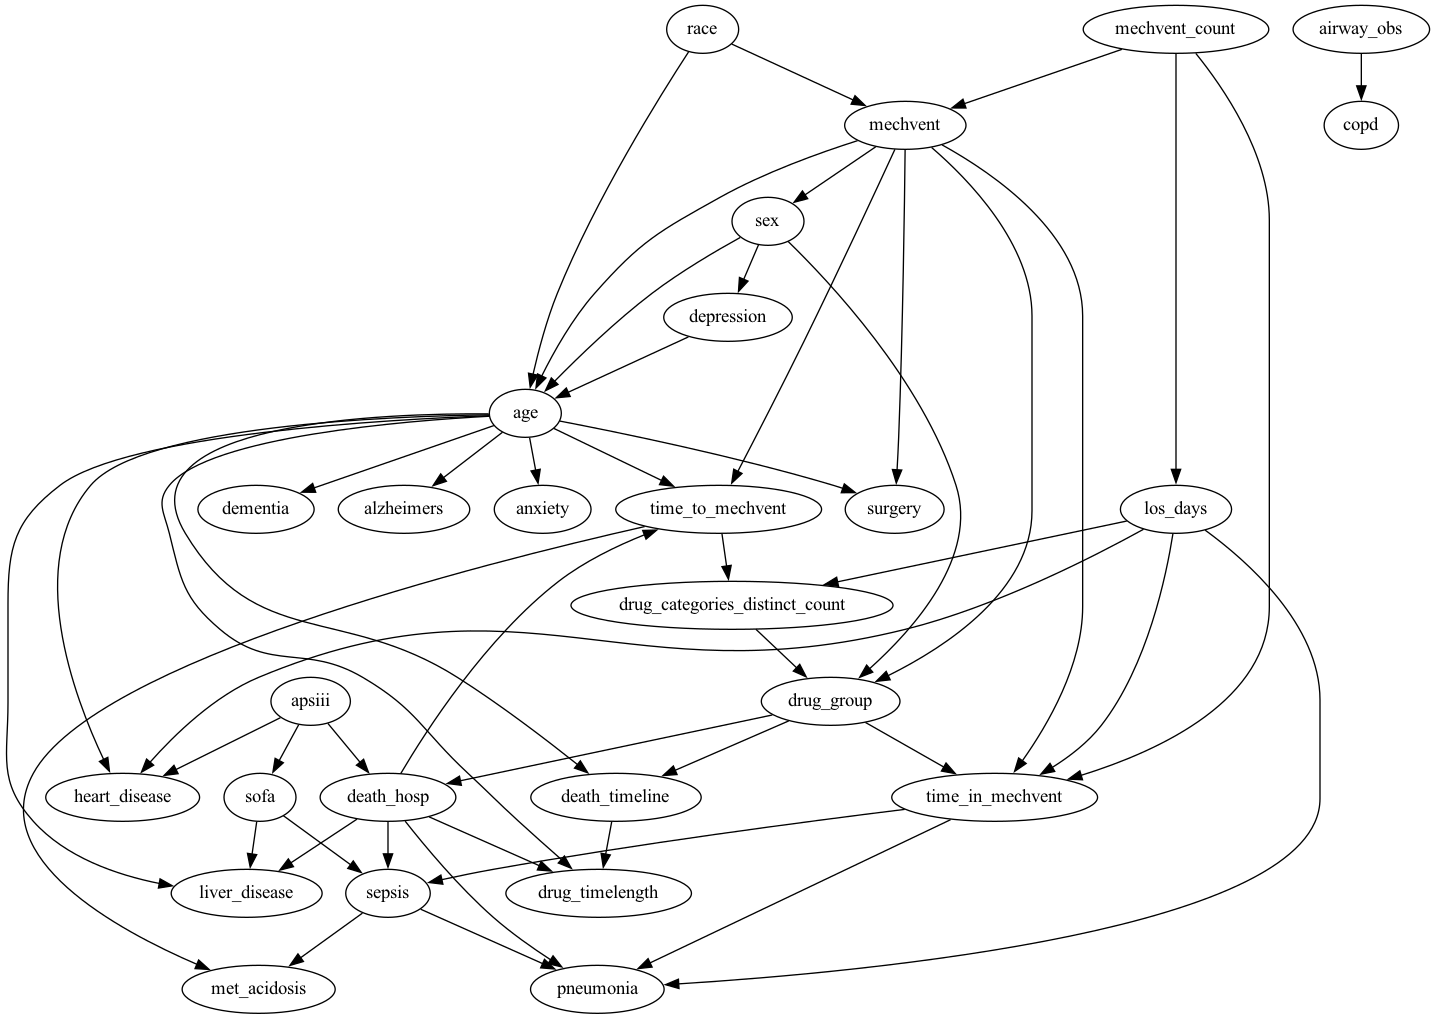

In [47]:
# import glob
import pydot

graph = pydot.Dot(graph_type='digraph')

for i in colnames:
    graph.add_node(pydot.Node(i))

for i in edges_voted.keys():
    if edges_voted[i] == 1:
        from_node = i.split(',')[0]
        to_node   = i.split(',')[1]
        graph.add_edge(pydot.Edge(from_node, to_node))
    elif edges_voted[i] == -1:
        from_node = i.split(',')[1]
        to_node   = i.split(',')[0]
        graph.add_edge(pydot.Edge(from_node, to_node))
    elif edges_voted[i] == 2:
        pass
    else:
        pass
    
#     graph.write_png(data['name'] + '.png')

from IPython.display import Image, display
plt = Image(graph.create_png())
display(plt)

# Create digraph text

In [48]:
graph_str = "digraph {"

for i in edges_voted.keys():
    if edges_voted[i] == 1:
        from_node = i.split(',')[0]
        to_node   = i.split(',')[1]
        graph_str = graph_str + from_node + "->" + to_node + ";"
    elif edges_voted[i] == -1:
        from_node = i.split(',')[1]
        to_node   = i.split(',')[0]
        graph_str = graph_str + to_node + "->" + from_node + ";"
    elif edges_voted[i] == 2:
        pass
    else:
        pass
    
graph_str = graph_str + "}"
print(graph_str)

digraph {sex->age;sex->depression;sex->mechvent;sex->drug_group;age->race;age->surgery;age->dementia;age->alzheimers;age->depression;age->anxiety;age->liver_disease;age->heart_disease;age->mechvent;age->drug_timelength;age->death_timeline;age->time_to_mechvent;race->mechvent;sofa->apsiii;sofa->sepsis;sofa->liver_disease;apsiii->heart_disease;apsiii->death_hosp;surgery->mechvent;pneumonia->sepsis;pneumonia->death_hosp;pneumonia->los_days;pneumonia->time_in_mechvent;sepsis->met_acidosis;sepsis->death_hosp;sepsis->time_in_mechvent;met_acidosis->time_to_mechvent;airway_obs->copd;liver_disease->death_hosp;heart_disease->los_days;mechvent->mechvent_count;mechvent->drug_group;mechvent->time_to_mechvent;mechvent->time_in_mechvent;mechvent_count->los_days;mechvent_count->time_in_mechvent;drug_group->drug_categories_distinct_count;drug_group->death_hosp;drug_group->death_timeline;drug_group->time_in_mechvent;drug_categories_distinct_count->los_days;drug_categories_distinct_count->time_to_mechven

In [49]:
# graph_str = "digraph {v0->y;W0-> v0;W1-> v0;W2-> v0;W3-> v0;W4-> v0;Z0-> v0; Z1-> v0;W0-> y;W1-> y; W2-> y;W3-> y;W4-> y;X0-> y;}"
# print(graph_str)

# Integration of DoWhy

In [50]:
import numpy as np
import pandas as pd

import dowhy
from dowhy import CausalModel
import dowhy.datasets

# Avoid printing dataconversion warnings from sklearn
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

# Config dict to set the logging level
import logging.config
DEFAULT_LOGGING = {
    'version': 1,
    'disable_existing_loggers': False,
    'loggers': {
        '': {
            'level': 'WARN',
        },
    }
}

logging.config.dictConfig(DEFAULT_LOGGING)

In [51]:
# [B] propensity_score_estimator
# [B] propensity_score_matching_estimator
# [B] propensity_score_stratification_estimator
# [B] propensity_score_weighting_estimator
# [NR] distance_matching_estimator (iv.distance_matching)
# generalized_linear_model_estimator [DON'T KNOW HOW TO USE IT: glm_family="statsmodels.api.families.Binomial()"]
# [NR] regression_estimator (iv.regression)
# [NR] two_stage_regression_estimator (iv.two_stage_regression)
# [Y] linear_regression_estimator
# [NR] instrumental_variable_estimator
# [NR] regression_discontinuity_estimator

# * [B] Propensity Score Matching: "backdoor.propensity_score_matching"
# * [B] Propensity Score Stratification: "backdoor.propensity_score_stratification"
# * [B] Propensity Score-based Inverse Weighting: "backdoor.propensity_score_weighting"
# * [Y] Linear Regression: "backdoor.linear_regression"
# * Generalized Linear Models (e.g., logistic regression): "backdoor.generalized_linear_model" [DON'T KNOW HOW TO USE IT: glm_family="statsmodels.api.families.Binomial()"]
# * [NR] Instrumental Variables: "iv.instrumental_variable"
# * [NR] Regression Discontinuity: "iv.regression_discontinuity"
# * [NR] iv.regression

In [52]:
# draw graph from https://www.pywhy.org/dowhy/v0.8/example_notebooks/dowhy_confounder_example.html

# Causal Effect Estimation

In [53]:
t = "drug_group"
outcomes = ["death_hosp","death_timeline","los_days","time_in_mechvent"]
unit = "ate" # , "att", "atc": Not our concern right now

methods = ["backdoor.linear_regression", "backdoor.propensity_score_matching"]

## Hal vs No drug

In [54]:
selected_data = data[data['drug_group']!=1]
selected_data['drug_group'].replace({0: False, 2: True}, inplace=True)
print(selected_data.shape)
print(selected_data[selected_data['drug_group']==False].shape)
print(selected_data[selected_data['drug_group']==True].shape)

(1135, 27)
(462, 27)
(673, 27)


/var/folders/k5/t6qrq2v55gxd80p9mdn45x9r8q8tz2/T/ipykernel_10023/2562421146.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['drug_group'].replace({0: False, 2: True}, inplace=True)


In [55]:
# got this from an earlier commit in the repo
graph_str = "digraph {sex->age;sex->depression;sex->mechvent;sex->drug_group;age->race;age->surgery;age->dementia;age->alzheimers;age->depression;age->anxiety;age->liver_disease;age->heart_disease;age->mechvent;age->drug_timelength;age->death_timeline;age->time_to_mechvent;race->mechvent;sofa->apsiii;sofa->sepsis;sofa->liver_disease;apsiii->heart_disease;apsiii->death_hosp;surgery->mechvent;pneumonia->sepsis;pneumonia->death_hosp;pneumonia->los_days;pneumonia->time_in_mechvent;sepsis->met_acidosis;sepsis->death_hosp;sepsis->time_in_mechvent;met_acidosis->time_to_mechvent;airway_obs->copd;liver_disease->death_hosp;heart_disease->los_days;mechvent->mechvent_count;mechvent->drug_group;mechvent->time_to_mechvent;mechvent->time_in_mechvent;mechvent_count->los_days;mechvent_count->time_in_mechvent;drug_group->drug_categories_distinct_count;drug_group->death_hosp;drug_group->death_timeline;drug_group->time_in_mechvent;drug_categories_distinct_count->los_days;drug_categories_distinct_count->time_to_mechvent;drug_timelength->death_hosp;drug_timelength->death_timeline;death_hosp->time_to_mechvent;los_days->time_in_mechvent;}"

In [56]:
model=CausalModel(data = selected_data, treatment=t, outcome=outcomes[0], graph=graph_str)
    
# identification
identified_estimand = model.identify_effect(proceed_when_unidentifiable=True)
print(identified_estimand)

Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
      d                         
─────────────(E[death_hosp|age])
d[drug_group]                   
Estimand assumption 1, Unconfoundedness: If U→{drug_group} and U→death_hosp then P(death_hosp|drug_group,age,U) = P(death_hosp|drug_group,age)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!



In [57]:
causal_estimate = model.estimate_effect(identified_estimand, method_name=methods[0], target_units=unit)
print(causal_estimate.value)

linear_regression
{'control_value': 0, 'treatment_value': 1, 'test_significance': None, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['apsiii', 'sofa', 'drug_timelength', 'sepsis', 'pneumonia', 'liver_disease']}


/Users/adib/.virtualenvs/delirium/lib/python3.9/site-packages/dowhy/causal_estimator.py:254: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._data[prefix + str(em)] = pd.qcut(self._data[em],
/Users/adib/.virtualenvs/delirium/lib/python3.9/site-packages/dowhy/causal_estimator.py:254: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._data[prefix + str(em)] = pd.qcut(self._data[em],
/Users/adib/.virtualenvs/delirium/lib/python3.9/site-packages/dowhy/causal_estimator.py:254: SettingWithCopyWarning: 
A valu

0.037441738917517814


In [58]:
def refute():
    # refute 1
    res_random = model.refute_estimate(identified_estimand, causal_estimate, 
                                       method_name="random_common_cause")
    print(res_random)
    print("####################################################")

    # refute 2
    res_unobserved = model.refute_estimate(identified_estimand, causal_estimate, 
                                           method_name="add_unobserved_common_cause", 
                                           confounders_effect_on_treatment="binary_flip", 
                                           confounders_effect_on_outcome="linear", 
                                           effect_strength_on_treatment=0.01, 
                                           effect_strength_on_outcome=0.02)
    print(res_unobserved)
    print("####################################################")

    # refute 3
    res_placebo = model.refute_estimate(identified_estimand, causal_estimate, 
                                        method_name="placebo_treatment_refuter", 
                                        placebo_type="permute")
    print(res_placebo)
    print("####################################################")

    # refute 4
    res_subset = model.refute_estimate(identified_estimand, causal_estimate, 
                                       method_name="data_subset_refuter", 
                                       subset_fraction=0.9)
    print(res_subset)

In [59]:
refute()

{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['apsiii', 'sofa', 'drug_timelength', 'sepsis', 'pneumonia', 'liver_disease']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['apsiii', 'sofa', 'drug_timelength', 'sepsis', 'pneumonia', 'liver_disease']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['apsiii', 'sofa', 'drug_timelength', 'sepsis', 'pneumonia', 'liver_disease']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['apsiii', 'sofa', 'drug_timelength', 'seps

{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['apsiii', 'sofa', 'drug_timelength', 'sepsis', 'pneumonia', 'liver_disease']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['apsiii', 'sofa', 'drug_timelength', 'sepsis', 'pneumonia', 'liver_disease']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['apsiii', 'sofa', 'drug_timelength', 'sepsis', 'pneumonia', 'liver_disease']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['apsiii', 'sofa', 'drug_timelength', 'seps

{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['apsiii', 'sofa', 'drug_timelength', 'sepsis', 'pneumonia', 'liver_disease']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['apsiii', 'sofa', 'drug_timelength', 'sepsis', 'pneumonia', 'liver_disease']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['apsiii', 'sofa', 'drug_timelength', 'sepsis', 'pneumonia', 'liver_disease']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['apsiii', 'sofa', 'drug_timelength', 'seps

{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['apsiii', 'sofa', 'drug_timelength', 'sepsis', 'pneumonia', 'liver_disease']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['apsiii', 'sofa', 'drug_timelength', 'sepsis', 'pneumonia', 'liver_disease']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['apsiii', 'sofa', 'drug_timelength', 'sepsis', 'pneumonia', 'liver_disease']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['apsiii', 'sofa', 'drug_timelength', 'seps

{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['apsiii', 'sofa', 'drug_timelength', 'sepsis', 'pneumonia', 'liver_disease']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['apsiii', 'sofa', 'drug_timelength', 'sepsis', 'pneumonia', 'liver_disease']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['apsiii', 'sofa', 'drug_timelength', 'sepsis', 'pneumonia', 'liver_disease']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['apsiii', 'sofa', 'drug_timelength', 'seps

{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['apsiii', 'sofa', 'drug_timelength', 'sepsis', 'pneumonia', 'liver_disease']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['apsiii', 'sofa', 'drug_timelength', 'sepsis', 'pneumonia', 'liver_disease']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['apsiii', 'sofa', 'drug_timelength', 'sepsis', 'pneumonia', 'liver_disease']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['apsiii', 'sofa', 'drug_timelength', 'seps

{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['apsiii', 'sofa', 'drug_timelength', 'sepsis', 'pneumonia', 'liver_disease']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['apsiii', 'sofa', 'drug_timelength', 'sepsis', 'pneumonia', 'liver_disease']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['apsiii', 'sofa', 'drug_timelength', 'sepsis', 'pneumonia', 'liver_disease']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['apsiii', 'sofa', 'drug_timelength', 'seps

{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['apsiii', 'sofa', 'drug_timelength', 'sepsis', 'pneumonia', 'liver_disease']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['apsiii', 'sofa', 'drug_timelength', 'sepsis', 'pneumonia', 'liver_disease']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['apsiii', 'sofa', 'drug_timelength', 'sepsis', 'pneumonia', 'liver_disease']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['apsiii', 'sofa', 'drug_timelength', 'seps

{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['apsiii', 'sofa', 'drug_timelength', 'sepsis', 'pneumonia', 'liver_disease']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['apsiii', 'sofa', 'drug_timelength', 'sepsis', 'pneumonia', 'liver_disease']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['apsiii', 'sofa', 'drug_timelength', 'sepsis', 'pneumonia', 'liver_disease']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['apsiii', 'sofa', 'drug_timelength', 'seps

{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['apsiii', 'sofa', 'drug_timelength', 'sepsis', 'pneumonia', 'liver_disease']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['apsiii', 'sofa', 'drug_timelength', 'sepsis', 'pneumonia', 'liver_disease']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['apsiii', 'sofa', 'drug_timelength', 'sepsis', 'pneumonia', 'liver_disease']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['apsiii', 'sofa', 'drug_timelength', 'seps

In [60]:
causal_estimate = model.estimate_effect(identified_estimand, method_name=methods[1], target_units=unit)
print(causal_estimate.value)

propensity_score_matching


/Users/adib/.virtualenvs/delirium/lib/python3.9/site-packages/dowhy/causal_estimators/propensity_score_estimator.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._data[self.propensity_score_column] = self.propensity_score_model.predict_proba(self._observed_common_causes)[:, 1]


-0.018502202643171806


In [61]:
refute()

Refute: Add a random common cause
Estimated effect:-0.018502202643171806
New effect:0.0354273127753304
p value:0.0

####################################################
Refute: Add an Unobserved Common Cause
Estimated effect:-0.018502202643171806
New effect:0.07068043078158114

####################################################
Refute: Use a Placebo Treatment
Estimated effect:-0.018502202643171806
New effect:0.0005374449339207055
p value:0.92

####################################################
Refute: Use a subset of data
Estimated effect:-0.018502202643171806
New effect:0.027808219178082183
p value:0.24



In [62]:
model=CausalModel(data = selected_data, treatment=t, outcome=outcomes[1], graph=graph_str)
    
# identification
identified_estimand = model.identify_effect(proceed_when_unidentifiable=True)
print(identified_estimand)

Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
      d                             
─────────────(E[death_timeline|age])
d[drug_group]                       
Estimand assumption 1, Unconfoundedness: If U→{drug_group} and U→death_timeline then P(death_timeline|drug_group,age,U) = P(death_timeline|drug_group,age)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!



In [63]:
causal_estimate = model.estimate_effect(identified_estimand, method_name=methods[0], target_units=unit)
print(causal_estimate.value)

linear_regression
{'control_value': 0, 'treatment_value': 1, 'test_significance': None, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['drug_timelength']}
-0.12725884381878383


/Users/adib/.virtualenvs/delirium/lib/python3.9/site-packages/dowhy/causal_estimator.py:254: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._data[prefix + str(em)] = pd.qcut(self._data[em],


In [64]:
refute()

{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['drug_timelength']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['drug_timelength']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['drug_timelength']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['drug_timelength']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['drug_timelengt

{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['drug_timelength']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['drug_timelength']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['drug_timelength']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['drug_timelength']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['drug_timelengt

{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['drug_timelength']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['drug_timelength']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['drug_timelength']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['drug_timelength']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['drug_timelengt

{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['drug_timelength']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['drug_timelength']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['drug_timelength']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['drug_timelength']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['drug_timelengt

{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['drug_timelength']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['drug_timelength']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['drug_timelength']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['drug_timelength']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['drug_timelengt

{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['drug_timelength']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['drug_timelength']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['drug_timelength']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['drug_timelength']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['drug_timelengt

{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['drug_timelength']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['drug_timelength']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['drug_timelength']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['drug_timelength']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['drug_timelengt

{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['drug_timelength']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['drug_timelength']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['drug_timelength']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['drug_timelength']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['drug_timelengt

In [65]:
causal_estimate = model.estimate_effect(identified_estimand, method_name=methods[1], target_units=unit)
print(causal_estimate.value)

propensity_score_matching
-0.04405286343612335


/Users/adib/.virtualenvs/delirium/lib/python3.9/site-packages/dowhy/causal_estimators/propensity_score_estimator.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._data[self.propensity_score_column] = self.propensity_score_model.predict_proba(self._observed_common_causes)[:, 1]


In [66]:
refute()

Refute: Add a random common cause
Estimated effect:-0.04405286343612335
New effect:-0.12259911894273129
p value:0.26

####################################################
Refute: Add an Unobserved Common Cause
Estimated effect:-0.04405286343612335
New effect:0.10369534378892384

####################################################
Refute: Use a Placebo Treatment
Estimated effect:-0.04405286343612335
New effect:-0.014149779735682821
p value:0.96

####################################################
Refute: Use a subset of data
Estimated effect:-0.04405286343612335
New effect:-0.09894324853228963
p value:0.76



In [67]:
model=CausalModel(data = selected_data, treatment=t, outcome=outcomes[2], graph=graph_str)
    
# identification
identified_estimand = model.identify_effect(proceed_when_unidentifiable=True)
print(identified_estimand)

Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
      d                                          
─────────────(E[los_days|mechvent,heart_disease])
d[drug_group]                                    
Estimand assumption 1, Unconfoundedness: If U→{drug_group} and U→los_days then P(los_days|drug_group,mechvent,heart_disease,U) = P(los_days|drug_group,mechvent,heart_disease)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
Estimand expression:
 ⎡                d                                 d                                        ⎤
E⎢─────────────────────────────────(los_days)⋅─────────────([drug_categories_distinct_count])⎥
 ⎣d[drug_categories_distinct_count]           d[drug_group]                                  ⎦
Estimand assumption 1, Full-mediation: drug_categories_distinct_count intercepts (blocks) all directed paths from drug_group to l,o,s,_,d,a,y,s.
Estimand assumption 2,

In [68]:
causal_estimate = model.estimate_effect(identified_estimand, method_name=methods[0], target_units=unit)
print(causal_estimate.value)

linear_regression
{'control_value': 0, 'treatment_value': 1, 'test_significance': None, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['apsiii', 'sofa', 'mechvent_count', 'heart_disease', 'pneumonia']}


/Users/adib/.virtualenvs/delirium/lib/python3.9/site-packages/dowhy/causal_estimator.py:254: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._data[prefix + str(em)] = pd.qcut(self._data[em],
/Users/adib/.virtualenvs/delirium/lib/python3.9/site-packages/dowhy/causal_estimator.py:254: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._data[prefix + str(em)] = pd.qcut(self._data[em],
/Users/adib/.virtualenvs/delirium/lib/python3.9/site-packages/dowhy/causal_estimator.py:254: SettingWithCopyWarning: 
A valu

1.8651170951555525


In [69]:
refute()

{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['apsiii', 'sofa', 'mechvent_count', 'heart_disease', 'pneumonia']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['apsiii', 'sofa', 'mechvent_count', 'heart_disease', 'pneumonia']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['apsiii', 'sofa', 'mechvent_count', 'heart_disease', 'pneumonia']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['apsiii', 'sofa', 'mechvent_count', 'heart_disease', 'pneumonia']}
{'contro

{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['apsiii', 'sofa', 'mechvent_count', 'heart_disease', 'pneumonia']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['apsiii', 'sofa', 'mechvent_count', 'heart_disease', 'pneumonia']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['apsiii', 'sofa', 'mechvent_count', 'heart_disease', 'pneumonia']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['apsiii', 'sofa', 'mechvent_count', 'heart_disease', 'pneumonia']}
{'contro

{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['apsiii', 'sofa', 'mechvent_count', 'heart_disease', 'pneumonia']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['apsiii', 'sofa', 'mechvent_count', 'heart_disease', 'pneumonia']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['apsiii', 'sofa', 'mechvent_count', 'heart_disease', 'pneumonia']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['apsiii', 'sofa', 'mechvent_count', 'heart_disease', 'pneumonia']}
{'contro

Refute: Add an Unobserved Common Cause
Estimated effect:1.8651170951555525
New effect:1.863166079960335

####################################################
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['apsiii', 'sofa', 'mechvent_count', 'heart_disease', 'pneumonia']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['apsiii', 'sofa', 'mechvent_count', 'heart_disease', 'pneumonia']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['apsiii', 'sofa', 'mechvent_count', 'heart_disease', 'pneumonia']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength':

{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['apsiii', 'sofa', 'mechvent_count', 'heart_disease', 'pneumonia']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['apsiii', 'sofa', 'mechvent_count', 'heart_disease', 'pneumonia']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['apsiii', 'sofa', 'mechvent_count', 'heart_disease', 'pneumonia']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['apsiii', 'sofa', 'mechvent_count', 'heart_disease', 'pneumonia']}
{'contro

{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['apsiii', 'sofa', 'mechvent_count', 'heart_disease', 'pneumonia']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['apsiii', 'sofa', 'mechvent_count', 'heart_disease', 'pneumonia']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['apsiii', 'sofa', 'mechvent_count', 'heart_disease', 'pneumonia']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['apsiii', 'sofa', 'mechvent_count', 'heart_disease', 'pneumonia']}
{'contro

{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['apsiii', 'sofa', 'mechvent_count', 'heart_disease', 'pneumonia']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['apsiii', 'sofa', 'mechvent_count', 'heart_disease', 'pneumonia']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['apsiii', 'sofa', 'mechvent_count', 'heart_disease', 'pneumonia']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['apsiii', 'sofa', 'mechvent_count', 'heart_disease', 'pneumonia']}
{'contro

{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['apsiii', 'sofa', 'mechvent_count', 'heart_disease', 'pneumonia']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['apsiii', 'sofa', 'mechvent_count', 'heart_disease', 'pneumonia']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['apsiii', 'sofa', 'mechvent_count', 'heart_disease', 'pneumonia']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['apsiii', 'sofa', 'mechvent_count', 'heart_disease', 'pneumonia']}
{'contro

{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['apsiii', 'sofa', 'mechvent_count', 'heart_disease', 'pneumonia']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['apsiii', 'sofa', 'mechvent_count', 'heart_disease', 'pneumonia']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['apsiii', 'sofa', 'mechvent_count', 'heart_disease', 'pneumonia']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['apsiii', 'sofa', 'mechvent_count', 'heart_disease', 'pneumonia']}
{'contro

In [70]:
causal_estimate = model.estimate_effect(identified_estimand, method_name=methods[1], target_units=unit)
print(causal_estimate.value)

propensity_score_matching


/Users/adib/.virtualenvs/delirium/lib/python3.9/site-packages/dowhy/causal_estimators/propensity_score_estimator.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._data[self.propensity_score_column] = self.propensity_score_model.predict_proba(self._observed_common_causes)[:, 1]


2.3745247577092505


In [71]:
refute()

Refute: Add a random common cause
Estimated effect:2.3745247577092505
New effect:1.936094651982379
p value:0.06000000000000005

####################################################
Refute: Add an Unobserved Common Cause
Estimated effect:2.3745247577092505
New effect:2.3122246350344313

####################################################
Refute: Use a Placebo Treatment
Estimated effect:2.3745247577092505
New effect:0.2486232070484586
p value:0.82

####################################################
Refute: Use a subset of data
Estimated effect:2.3745247577092505
New effect:1.9563980596868882
p value:0.98



In [72]:
model=CausalModel(data = selected_data, treatment=t, outcome=outcomes[3], graph=graph_str)
    
# identification
identified_estimand = model.identify_effect(proceed_when_unidentifiable=True)
print(identified_estimand)

Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
      d                                        
─────────────(E[time_in_mechvent|age,mechvent])
d[drug_group]                                  
Estimand assumption 1, Unconfoundedness: If U→{drug_group} and U→time_in_mechvent then P(time_in_mechvent|drug_group,age,mechvent,U) = P(time_in_mechvent|drug_group,age,mechvent)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!



In [73]:
causal_estimate = model.estimate_effect(identified_estimand, method_name=methods[0], target_units=unit)
print(causal_estimate.value)

linear_regression
{'control_value': 0, 'treatment_value': 1, 'test_significance': None, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['mechvent_count', 'apsiii', 'sofa', 'sepsis', 'heart_disease', 'pneumonia']}


/Users/adib/.virtualenvs/delirium/lib/python3.9/site-packages/dowhy/causal_estimator.py:254: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._data[prefix + str(em)] = pd.qcut(self._data[em],
/Users/adib/.virtualenvs/delirium/lib/python3.9/site-packages/dowhy/causal_estimator.py:254: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._data[prefix + str(em)] = pd.qcut(self._data[em],
/Users/adib/.virtualenvs/delirium/lib/python3.9/site-packages/dowhy/causal_estimator.py:254: SettingWithCopyWarning: 
A valu

11.541977502281213


In [74]:
refute()

{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['mechvent_count', 'apsiii', 'sofa', 'sepsis', 'heart_disease', 'pneumonia']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['mechvent_count', 'apsiii', 'sofa', 'sepsis', 'heart_disease', 'pneumonia']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['mechvent_count', 'apsiii', 'sofa', 'sepsis', 'heart_disease', 'pneumonia']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['mechvent_count', 'apsiii', 'sofa', 'sepsis',

{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['mechvent_count', 'apsiii', 'sofa', 'sepsis', 'heart_disease', 'pneumonia']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['mechvent_count', 'apsiii', 'sofa', 'sepsis', 'heart_disease', 'pneumonia']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['mechvent_count', 'apsiii', 'sofa', 'sepsis', 'heart_disease', 'pneumonia']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['mechvent_count', 'apsiii', 'sofa', 'sepsis',

{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['mechvent_count', 'apsiii', 'sofa', 'sepsis', 'heart_disease', 'pneumonia']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['mechvent_count', 'apsiii', 'sofa', 'sepsis', 'heart_disease', 'pneumonia']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['mechvent_count', 'apsiii', 'sofa', 'sepsis', 'heart_disease', 'pneumonia']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['mechvent_count', 'apsiii', 'sofa', 'sepsis',

{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['mechvent_count', 'apsiii', 'sofa', 'sepsis', 'heart_disease', 'pneumonia']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['mechvent_count', 'apsiii', 'sofa', 'sepsis', 'heart_disease', 'pneumonia']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['mechvent_count', 'apsiii', 'sofa', 'sepsis', 'heart_disease', 'pneumonia']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['mechvent_count', 'apsiii', 'sofa', 'sepsis',

{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['mechvent_count', 'apsiii', 'sofa', 'sepsis', 'heart_disease', 'pneumonia']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['mechvent_count', 'apsiii', 'sofa', 'sepsis', 'heart_disease', 'pneumonia']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['mechvent_count', 'apsiii', 'sofa', 'sepsis', 'heart_disease', 'pneumonia']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['mechvent_count', 'apsiii', 'sofa', 'sepsis',

{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['mechvent_count', 'apsiii', 'sofa', 'sepsis', 'heart_disease', 'pneumonia']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['mechvent_count', 'apsiii', 'sofa', 'sepsis', 'heart_disease', 'pneumonia']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['mechvent_count', 'apsiii', 'sofa', 'sepsis', 'heart_disease', 'pneumonia']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['mechvent_count', 'apsiii', 'sofa', 'sepsis',

{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['mechvent_count', 'apsiii', 'sofa', 'sepsis', 'heart_disease', 'pneumonia']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['mechvent_count', 'apsiii', 'sofa', 'sepsis', 'heart_disease', 'pneumonia']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['mechvent_count', 'apsiii', 'sofa', 'sepsis', 'heart_disease', 'pneumonia']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['mechvent_count', 'apsiii', 'sofa', 'sepsis',

{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['mechvent_count', 'apsiii', 'sofa', 'sepsis', 'heart_disease', 'pneumonia']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['mechvent_count', 'apsiii', 'sofa', 'sepsis', 'heart_disease', 'pneumonia']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['mechvent_count', 'apsiii', 'sofa', 'sepsis', 'heart_disease', 'pneumonia']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['mechvent_count', 'apsiii', 'sofa', 'sepsis',

{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['mechvent_count', 'apsiii', 'sofa', 'sepsis', 'heart_disease', 'pneumonia']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['mechvent_count', 'apsiii', 'sofa', 'sepsis', 'heart_disease', 'pneumonia']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['mechvent_count', 'apsiii', 'sofa', 'sepsis', 'heart_disease', 'pneumonia']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['mechvent_count', 'apsiii', 'sofa', 'sepsis',

{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['mechvent_count', 'apsiii', 'sofa', 'sepsis', 'heart_disease', 'pneumonia']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['mechvent_count', 'apsiii', 'sofa', 'sepsis', 'heart_disease', 'pneumonia']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['mechvent_count', 'apsiii', 'sofa', 'sepsis', 'heart_disease', 'pneumonia']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['mechvent_count', 'apsiii', 'sofa', 'sepsis',

In [75]:
causal_estimate = model.estimate_effect(identified_estimand, method_name=methods[1], target_units=unit)
print(causal_estimate.value)

propensity_score_matching
16.68809104258444

/Users/adib/.virtualenvs/delirium/lib/python3.9/site-packages/dowhy/causal_estimators/propensity_score_estimator.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._data[self.propensity_score_column] = self.propensity_score_model.predict_proba(self._observed_common_causes)[:, 1]


In [76]:
refute()

Refute: Add a random common cause
Estimated effect:16.68809104258444
New effect:12.517747283406754
p value:0.19999999999999996

####################################################
Refute: Add an Unobserved Common Cause
Estimated effect:16.68809104258444
New effect:20.048785840681

####################################################
Refute: Use a Placebo Treatment
Estimated effect:16.68809104258444
New effect:0.16400000000000073
p value:0.94

####################################################
Refute: Use a subset of data
Estimated effect:16.68809104258444
New effect:17.351486790606657
p value:0.78



## Other Drug vs No drug

In [77]:
selected_data = data[data['drug_group']!=2]
selected_data['drug_group'].replace({0: False, 1: True}, inplace=True)
print(selected_data.shape)
print(selected_data[selected_data['drug_group']==False].shape)
print(selected_data[selected_data['drug_group']==True].shape)

(998, 27)
(462, 27)
(536, 27)


/var/folders/k5/t6qrq2v55gxd80p9mdn45x9r8q8tz2/T/ipykernel_10023/2718676519.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['drug_group'].replace({0: False, 1: True}, inplace=True)


In [78]:
model=CausalModel(data = selected_data, treatment=t, outcome=outcomes[0], graph=graph_str)
    
# identification
identified_estimand = model.identify_effect(proceed_when_unidentifiable=True)
print(identified_estimand)

Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
      d                         
─────────────(E[death_hosp|age])
d[drug_group]                   
Estimand assumption 1, Unconfoundedness: If U→{drug_group} and U→death_hosp then P(death_hosp|drug_group,age,U) = P(death_hosp|drug_group,age)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!



In [79]:
causal_estimate = model.estimate_effect(identified_estimand, method_name=methods[0], target_units=unit)
print(causal_estimate.value)

linear_regression
{'control_value': 0, 'treatment_value': 1, 'test_significance': None, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['apsiii', 'sofa', 'drug_timelength', 'sepsis', 'pneumonia', 'liver_disease']}


/Users/adib/.virtualenvs/delirium/lib/python3.9/site-packages/dowhy/causal_estimator.py:254: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._data[prefix + str(em)] = pd.qcut(self._data[em],
/Users/adib/.virtualenvs/delirium/lib/python3.9/site-packages/dowhy/causal_estimator.py:254: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._data[prefix + str(em)] = pd.qcut(self._data[em],
/Users/adib/.virtualenvs/delirium/lib/python3.9/site-packages/dowhy/causal_estimator.py:254: SettingWithCopyWarning: 
A valu

0.012991285540580155


In [80]:
refute()

{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['apsiii', 'sofa', 'drug_timelength', 'sepsis', 'pneumonia', 'liver_disease']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['apsiii', 'sofa', 'drug_timelength', 'sepsis', 'pneumonia', 'liver_disease']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['apsiii', 'sofa', 'drug_timelength', 'sepsis', 'pneumonia', 'liver_disease']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['apsiii', 'sofa', 'drug_timelength', 'seps

{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['apsiii', 'sofa', 'drug_timelength', 'sepsis', 'pneumonia', 'liver_disease']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['apsiii', 'sofa', 'drug_timelength', 'sepsis', 'pneumonia', 'liver_disease']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['apsiii', 'sofa', 'drug_timelength', 'sepsis', 'pneumonia', 'liver_disease']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['apsiii', 'sofa', 'drug_timelength', 'seps

{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['apsiii', 'sofa', 'drug_timelength', 'sepsis', 'pneumonia', 'liver_disease']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['apsiii', 'sofa', 'drug_timelength', 'sepsis', 'pneumonia', 'liver_disease']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['apsiii', 'sofa', 'drug_timelength', 'sepsis', 'pneumonia', 'liver_disease']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['apsiii', 'sofa', 'drug_timelength', 'seps

{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['apsiii', 'sofa', 'drug_timelength', 'sepsis', 'pneumonia', 'liver_disease']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['apsiii', 'sofa', 'drug_timelength', 'sepsis', 'pneumonia', 'liver_disease']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['apsiii', 'sofa', 'drug_timelength', 'sepsis', 'pneumonia', 'liver_disease']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['apsiii', 'sofa', 'drug_timelength', 'seps

{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['apsiii', 'sofa', 'drug_timelength', 'sepsis', 'pneumonia', 'liver_disease']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['apsiii', 'sofa', 'drug_timelength', 'sepsis', 'pneumonia', 'liver_disease']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['apsiii', 'sofa', 'drug_timelength', 'sepsis', 'pneumonia', 'liver_disease']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['apsiii', 'sofa', 'drug_timelength', 'seps

{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['apsiii', 'sofa', 'drug_timelength', 'sepsis', 'pneumonia', 'liver_disease']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['apsiii', 'sofa', 'drug_timelength', 'sepsis', 'pneumonia', 'liver_disease']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['apsiii', 'sofa', 'drug_timelength', 'sepsis', 'pneumonia', 'liver_disease']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['apsiii', 'sofa', 'drug_timelength', 'seps

{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['apsiii', 'sofa', 'drug_timelength', 'sepsis', 'pneumonia', 'liver_disease']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['apsiii', 'sofa', 'drug_timelength', 'sepsis', 'pneumonia', 'liver_disease']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['apsiii', 'sofa', 'drug_timelength', 'sepsis', 'pneumonia', 'liver_disease']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['apsiii', 'sofa', 'drug_timelength', 'seps

{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['apsiii', 'sofa', 'drug_timelength', 'sepsis', 'pneumonia', 'liver_disease']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['apsiii', 'sofa', 'drug_timelength', 'sepsis', 'pneumonia', 'liver_disease']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['apsiii', 'sofa', 'drug_timelength', 'sepsis', 'pneumonia', 'liver_disease']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['apsiii', 'sofa', 'drug_timelength', 'seps

{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['apsiii', 'sofa', 'drug_timelength', 'sepsis', 'pneumonia', 'liver_disease']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['apsiii', 'sofa', 'drug_timelength', 'sepsis', 'pneumonia', 'liver_disease']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['apsiii', 'sofa', 'drug_timelength', 'sepsis', 'pneumonia', 'liver_disease']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['apsiii', 'sofa', 'drug_timelength', 'seps

{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['apsiii', 'sofa', 'drug_timelength', 'sepsis', 'pneumonia', 'liver_disease']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['apsiii', 'sofa', 'drug_timelength', 'sepsis', 'pneumonia', 'liver_disease']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['apsiii', 'sofa', 'drug_timelength', 'sepsis', 'pneumonia', 'liver_disease']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['apsiii', 'sofa', 'drug_timelength', 'seps

In [81]:
causal_estimate = model.estimate_effect(identified_estimand, method_name=methods[1], target_units=unit)
print(causal_estimate.value)

propensity_score_matching


/Users/adib/.virtualenvs/delirium/lib/python3.9/site-packages/dowhy/causal_estimators/propensity_score_estimator.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._data[self.propensity_score_column] = self.propensity_score_model.predict_proba(self._observed_common_causes)[:, 1]


-0.050100200400801605


In [82]:
refute()

Refute: Add a random common cause
Estimated effect:-0.050100200400801605
New effect:0.016833667334669337
p value:0.0

####################################################
Refute: Add an Unobserved Common Cause
Estimated effect:-0.050100200400801605
New effect:0.004131786266708964

####################################################
Refute: Use a Placebo Treatment
Estimated effect:-0.050100200400801605
New effect:-0.006032064128256515
p value:0.8600000000000001

####################################################
Refute: Use a subset of data
Estimated effect:-0.050100200400801605
New effect:0.0039198218262806225
p value:0.16



In [83]:
model=CausalModel(data = selected_data, treatment=t, outcome=outcomes[1], graph=graph_str)
    
# identification
identified_estimand = model.identify_effect(proceed_when_unidentifiable=True)
print(identified_estimand)

Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
      d                             
─────────────(E[death_timeline|age])
d[drug_group]                       
Estimand assumption 1, Unconfoundedness: If U→{drug_group} and U→death_timeline then P(death_timeline|drug_group,age,U) = P(death_timeline|drug_group,age)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!



In [84]:
causal_estimate = model.estimate_effect(identified_estimand, method_name=methods[0], target_units=unit)
print(causal_estimate.value)

linear_regression
{'control_value': 0, 'treatment_value': 1, 'test_significance': None, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['drug_timelength']}
0.028759423882441126


/Users/adib/.virtualenvs/delirium/lib/python3.9/site-packages/dowhy/causal_estimator.py:254: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._data[prefix + str(em)] = pd.qcut(self._data[em],


In [85]:
refute()

{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['drug_timelength']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['drug_timelength']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['drug_timelength']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['drug_timelength']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['drug_timelengt

{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['drug_timelength']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['drug_timelength']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['drug_timelength']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['drug_timelength']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['drug_timelengt

{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['drug_timelength']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['drug_timelength']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['drug_timelength']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['drug_timelength']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['drug_timelengt

{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['drug_timelength']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['drug_timelength']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['drug_timelength']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['drug_timelength']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['drug_timelengt

{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['drug_timelength']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['drug_timelength']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['drug_timelength']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['drug_timelength']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['drug_timelengt

{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['drug_timelength']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['drug_timelength']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['drug_timelength']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['drug_timelength']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['drug_timelengt

{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['drug_timelength']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['drug_timelength']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['drug_timelength']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['drug_timelength']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['drug_timelengt

{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['drug_timelength']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['drug_timelength']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['drug_timelength']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['drug_timelength']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['drug_timelengt

In [86]:
causal_estimate = model.estimate_effect(identified_estimand, method_name=methods[1], target_units=unit)
print(causal_estimate.value)

propensity_score_matching


/Users/adib/.virtualenvs/delirium/lib/python3.9/site-packages/dowhy/causal_estimators/propensity_score_estimator.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._data[self.propensity_score_column] = self.propensity_score_model.predict_proba(self._observed_common_causes)[:, 1]


0.16733466933867736


In [87]:
refute()

Refute: Add a random common cause
Estimated effect:0.16733466933867736
New effect:-0.04776553106212424
p value:0.0

####################################################
Refute: Add an Unobserved Common Cause
Estimated effect:0.16733466933867736
New effect:0.1819708694071382

####################################################
Refute: Use a Placebo Treatment
Estimated effect:0.16733466933867736
New effect:0.034208416833667335
p value:0.88

####################################################
Refute: Use a subset of data
Estimated effect:0.16733466933867736
New effect:-0.0053452115812917585
p value:0.28



In [88]:
model=CausalModel(data = selected_data, treatment=t, outcome=outcomes[2], graph=graph_str)
    
# identification
identified_estimand = model.identify_effect(proceed_when_unidentifiable=True)
print(identified_estimand)

Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
      d                                          
─────────────(E[los_days|mechvent,heart_disease])
d[drug_group]                                    
Estimand assumption 1, Unconfoundedness: If U→{drug_group} and U→los_days then P(los_days|drug_group,mechvent,heart_disease,U) = P(los_days|drug_group,mechvent,heart_disease)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
Estimand expression:
 ⎡                d                                 d                                        ⎤
E⎢─────────────────────────────────(los_days)⋅─────────────([drug_categories_distinct_count])⎥
 ⎣d[drug_categories_distinct_count]           d[drug_group]                                  ⎦
Estimand assumption 1, Full-mediation: drug_categories_distinct_count intercepts (blocks) all directed paths from drug_group to l,o,s,_,d,a,y,s.
Estimand assumption 2,

In [89]:
causal_estimate = model.estimate_effect(identified_estimand, method_name=methods[0], target_units=unit)
print(causal_estimate.value)

linear_regression
{'control_value': 0, 'treatment_value': 1, 'test_significance': None, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['apsiii', 'sofa', 'mechvent_count', 'heart_disease', 'pneumonia']}


/Users/adib/.virtualenvs/delirium/lib/python3.9/site-packages/dowhy/causal_estimator.py:254: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._data[prefix + str(em)] = pd.qcut(self._data[em],
/Users/adib/.virtualenvs/delirium/lib/python3.9/site-packages/dowhy/causal_estimator.py:254: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._data[prefix + str(em)] = pd.qcut(self._data[em],
/Users/adib/.virtualenvs/delirium/lib/python3.9/site-packages/dowhy/causal_estimator.py:254: SettingWithCopyWarning: 
A valu

1.5934187860858104


In [90]:
refute()

{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['apsiii', 'sofa', 'mechvent_count', 'heart_disease', 'pneumonia']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['apsiii', 'sofa', 'mechvent_count', 'heart_disease', 'pneumonia']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['apsiii', 'sofa', 'mechvent_count', 'heart_disease', 'pneumonia']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['apsiii', 'sofa', 'mechvent_count', 'heart_disease', 'pneumonia']}
{'contro

{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['apsiii', 'sofa', 'mechvent_count', 'heart_disease', 'pneumonia']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['apsiii', 'sofa', 'mechvent_count', 'heart_disease', 'pneumonia']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['apsiii', 'sofa', 'mechvent_count', 'heart_disease', 'pneumonia']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['apsiii', 'sofa', 'mechvent_count', 'heart_disease', 'pneumonia']}
{'contro

{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['apsiii', 'sofa', 'mechvent_count', 'heart_disease', 'pneumonia']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['apsiii', 'sofa', 'mechvent_count', 'heart_disease', 'pneumonia']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['apsiii', 'sofa', 'mechvent_count', 'heart_disease', 'pneumonia']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['apsiii', 'sofa', 'mechvent_count', 'heart_disease', 'pneumonia']}
{'contro

Refute: Add an Unobserved Common Cause
Estimated effect:1.5934187860858104
New effect:1.647291536664821

####################################################
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['apsiii', 'sofa', 'mechvent_count', 'heart_disease', 'pneumonia']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['apsiii', 'sofa', 'mechvent_count', 'heart_disease', 'pneumonia']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['apsiii', 'sofa', 'mechvent_count', 'heart_disease', 'pneumonia']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength':

{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['apsiii', 'sofa', 'mechvent_count', 'heart_disease', 'pneumonia']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['apsiii', 'sofa', 'mechvent_count', 'heart_disease', 'pneumonia']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['apsiii', 'sofa', 'mechvent_count', 'heart_disease', 'pneumonia']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['apsiii', 'sofa', 'mechvent_count', 'heart_disease', 'pneumonia']}
{'contro

{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['apsiii', 'sofa', 'mechvent_count', 'heart_disease', 'pneumonia']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['apsiii', 'sofa', 'mechvent_count', 'heart_disease', 'pneumonia']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['apsiii', 'sofa', 'mechvent_count', 'heart_disease', 'pneumonia']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['apsiii', 'sofa', 'mechvent_count', 'heart_disease', 'pneumonia']}
{'contro

{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['apsiii', 'sofa', 'mechvent_count', 'heart_disease', 'pneumonia']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['apsiii', 'sofa', 'mechvent_count', 'heart_disease', 'pneumonia']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['apsiii', 'sofa', 'mechvent_count', 'heart_disease', 'pneumonia']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['apsiii', 'sofa', 'mechvent_count', 'heart_disease', 'pneumonia']}
{'contro

{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['apsiii', 'sofa', 'mechvent_count', 'heart_disease', 'pneumonia']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['apsiii', 'sofa', 'mechvent_count', 'heart_disease', 'pneumonia']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['apsiii', 'sofa', 'mechvent_count', 'heart_disease', 'pneumonia']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['apsiii', 'sofa', 'mechvent_count', 'heart_disease', 'pneumonia']}
{'contro

{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['apsiii', 'sofa', 'mechvent_count', 'heart_disease', 'pneumonia']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['apsiii', 'sofa', 'mechvent_count', 'heart_disease', 'pneumonia']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['apsiii', 'sofa', 'mechvent_count', 'heart_disease', 'pneumonia']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['apsiii', 'sofa', 'mechvent_count', 'heart_disease', 'pneumonia']}
{'contro

In [91]:
causal_estimate = model.estimate_effect(identified_estimand, method_name=methods[1], target_units=unit)
print(causal_estimate.value)

propensity_score_matching


/Users/adib/.virtualenvs/delirium/lib/python3.9/site-packages/dowhy/causal_estimators/propensity_score_estimator.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._data[self.propensity_score_column] = self.propensity_score_model.predict_proba(self._observed_common_causes)[:, 1]


1.2734450901803607


In [92]:
refute()

Refute: Add a random common cause
Estimated effect:1.2734450901803607
New effect:1.9670772515030057
p value:0.0

####################################################
Refute: Add an Unobserved Common Cause
Estimated effect:1.2734450901803607
New effect:3.1643552289288364

####################################################
Refute: Use a Placebo Treatment
Estimated effect:1.2734450901803607
New effect:0.26960266432865726
p value:0.94

####################################################
Refute: Use a subset of data
Estimated effect:1.2734450901803607
New effect:1.7112285334075725
p value:0.58



In [93]:
model=CausalModel(data = selected_data, treatment=t, outcome=outcomes[3], graph=graph_str)
    
# identification
identified_estimand = model.identify_effect(proceed_when_unidentifiable=True)
print(identified_estimand)

Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
      d                                        
─────────────(E[time_in_mechvent|age,mechvent])
d[drug_group]                                  
Estimand assumption 1, Unconfoundedness: If U→{drug_group} and U→time_in_mechvent then P(time_in_mechvent|drug_group,age,mechvent,U) = P(time_in_mechvent|drug_group,age,mechvent)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!



In [94]:
causal_estimate = model.estimate_effect(identified_estimand, method_name=methods[0], target_units=unit)
print(causal_estimate.value)

linear_regression
{'control_value': 0, 'treatment_value': 1, 'test_significance': None, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['mechvent_count', 'apsiii', 'sofa', 'sepsis', 'heart_disease', 'pneumonia']}


/Users/adib/.virtualenvs/delirium/lib/python3.9/site-packages/dowhy/causal_estimator.py:254: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._data[prefix + str(em)] = pd.qcut(self._data[em],
/Users/adib/.virtualenvs/delirium/lib/python3.9/site-packages/dowhy/causal_estimator.py:254: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._data[prefix + str(em)] = pd.qcut(self._data[em],
/Users/adib/.virtualenvs/delirium/lib/python3.9/site-packages/dowhy/causal_estimator.py:254: SettingWithCopyWarning: 
A valu

9.282765405931379


In [95]:
refute()

{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['mechvent_count', 'apsiii', 'sofa', 'sepsis', 'heart_disease', 'pneumonia']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['mechvent_count', 'apsiii', 'sofa', 'sepsis', 'heart_disease', 'pneumonia']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['mechvent_count', 'apsiii', 'sofa', 'sepsis', 'heart_disease', 'pneumonia']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['mechvent_count', 'apsiii', 'sofa', 'sepsis',

{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['mechvent_count', 'apsiii', 'sofa', 'sepsis', 'heart_disease', 'pneumonia']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['mechvent_count', 'apsiii', 'sofa', 'sepsis', 'heart_disease', 'pneumonia']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['mechvent_count', 'apsiii', 'sofa', 'sepsis', 'heart_disease', 'pneumonia']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['mechvent_count', 'apsiii', 'sofa', 'sepsis',

{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['mechvent_count', 'apsiii', 'sofa', 'sepsis', 'heart_disease', 'pneumonia']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['mechvent_count', 'apsiii', 'sofa', 'sepsis', 'heart_disease', 'pneumonia']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['mechvent_count', 'apsiii', 'sofa', 'sepsis', 'heart_disease', 'pneumonia']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['mechvent_count', 'apsiii', 'sofa', 'sepsis',

{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['mechvent_count', 'apsiii', 'sofa', 'sepsis', 'heart_disease', 'pneumonia']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['mechvent_count', 'apsiii', 'sofa', 'sepsis', 'heart_disease', 'pneumonia']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['mechvent_count', 'apsiii', 'sofa', 'sepsis', 'heart_disease', 'pneumonia']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['mechvent_count', 'apsiii', 'sofa', 'sepsis',

{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['mechvent_count', 'apsiii', 'sofa', 'sepsis', 'heart_disease', 'pneumonia']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['mechvent_count', 'apsiii', 'sofa', 'sepsis', 'heart_disease', 'pneumonia']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['mechvent_count', 'apsiii', 'sofa', 'sepsis', 'heart_disease', 'pneumonia']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['mechvent_count', 'apsiii', 'sofa', 'sepsis',

{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['mechvent_count', 'apsiii', 'sofa', 'sepsis', 'heart_disease', 'pneumonia']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['mechvent_count', 'apsiii', 'sofa', 'sepsis', 'heart_disease', 'pneumonia']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['mechvent_count', 'apsiii', 'sofa', 'sepsis', 'heart_disease', 'pneumonia']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['mechvent_count', 'apsiii', 'sofa', 'sepsis',

{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['mechvent_count', 'apsiii', 'sofa', 'sepsis', 'heart_disease', 'pneumonia']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['mechvent_count', 'apsiii', 'sofa', 'sepsis', 'heart_disease', 'pneumonia']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['mechvent_count', 'apsiii', 'sofa', 'sepsis', 'heart_disease', 'pneumonia']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['mechvent_count', 'apsiii', 'sofa', 'sepsis',

{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['mechvent_count', 'apsiii', 'sofa', 'sepsis', 'heart_disease', 'pneumonia']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['mechvent_count', 'apsiii', 'sofa', 'sepsis', 'heart_disease', 'pneumonia']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['mechvent_count', 'apsiii', 'sofa', 'sepsis', 'heart_disease', 'pneumonia']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['mechvent_count', 'apsiii', 'sofa', 'sepsis',

{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['mechvent_count', 'apsiii', 'sofa', 'sepsis', 'heart_disease', 'pneumonia']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['mechvent_count', 'apsiii', 'sofa', 'sepsis', 'heart_disease', 'pneumonia']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['mechvent_count', 'apsiii', 'sofa', 'sepsis', 'heart_disease', 'pneumonia']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['mechvent_count', 'apsiii', 'sofa', 'sepsis',

{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['mechvent_count', 'apsiii', 'sofa', 'sepsis', 'heart_disease', 'pneumonia']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['mechvent_count', 'apsiii', 'sofa', 'sepsis', 'heart_disease', 'pneumonia']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['mechvent_count', 'apsiii', 'sofa', 'sepsis', 'heart_disease', 'pneumonia']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['mechvent_count', 'apsiii', 'sofa', 'sepsis',

In [96]:
causal_estimate = model.estimate_effect(identified_estimand, method_name=methods[1], target_units=unit)
print(causal_estimate.value)

propensity_score_matching
9.821225784903136

/Users/adib/.virtualenvs/delirium/lib/python3.9/site-packages/dowhy/causal_estimators/propensity_score_estimator.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._data[self.propensity_score_column] = self.propensity_score_model.predict_proba(self._observed_common_causes)[:, 1]


In [97]:
refute()

Refute: Add a random common cause
Estimated effect:9.821225784903136
New effect:10.944266366065463
p value:0.62

####################################################
Refute: Add an Unobserved Common Cause
Estimated effect:9.821225784903136
New effect:9.189953414675829

####################################################
Refute: Use a Placebo Treatment
Estimated effect:9.821225784903136
New effect:-0.12781312625250515
p value:0.96

####################################################
Refute: Use a subset of data
Estimated effect:9.821225784903136
New effect:8.152253526354864
p value:0.54



## Hal vs Other drug

In [98]:
selected_data = data[data['drug_group']!=0]
selected_data['drug_group'].replace({1: False, 2: True}, inplace=True)
print(selected_data.shape)
print(selected_data[selected_data['drug_group']==False].shape)
print(selected_data[selected_data['drug_group']==True].shape)

(1209, 27)
(536, 27)
(673, 27)


/var/folders/k5/t6qrq2v55gxd80p9mdn45x9r8q8tz2/T/ipykernel_10023/54197501.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['drug_group'].replace({1: False, 2: True}, inplace=True)


In [99]:
model=CausalModel(data = selected_data, treatment="drug_group", outcome=outcomes[0], graph=graph_str)
    
# identification
identified_estimand = model.identify_effect(proceed_when_unidentifiable=True)
print(identified_estimand)

Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
      d                         
─────────────(E[death_hosp|age])
d[drug_group]                   
Estimand assumption 1, Unconfoundedness: If U→{drug_group} and U→death_hosp then P(death_hosp|drug_group,age,U) = P(death_hosp|drug_group,age)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!



In [100]:
causal_estimate = model.estimate_effect(identified_estimand, method_name=methods[0], target_units=unit)
print(causal_estimate.value)

linear_regression
{'control_value': 0, 'treatment_value': 1, 'test_significance': None, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['apsiii', 'sofa', 'drug_timelength', 'sepsis', 'pneumonia', 'liver_disease']}


/Users/adib/.virtualenvs/delirium/lib/python3.9/site-packages/dowhy/causal_estimator.py:254: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._data[prefix + str(em)] = pd.qcut(self._data[em],
/Users/adib/.virtualenvs/delirium/lib/python3.9/site-packages/dowhy/causal_estimator.py:254: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._data[prefix + str(em)] = pd.qcut(self._data[em],
/Users/adib/.virtualenvs/delirium/lib/python3.9/site-packages/dowhy/causal_estimator.py:254: SettingWithCopyWarning: 
A valu

0.024629934068177692


In [101]:
refute()

{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['apsiii', 'sofa', 'drug_timelength', 'sepsis', 'pneumonia', 'liver_disease']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['apsiii', 'sofa', 'drug_timelength', 'sepsis', 'pneumonia', 'liver_disease']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['apsiii', 'sofa', 'drug_timelength', 'sepsis', 'pneumonia', 'liver_disease']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['apsiii', 'sofa', 'drug_timelength', 'seps

{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['apsiii', 'sofa', 'drug_timelength', 'sepsis', 'pneumonia', 'liver_disease']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['apsiii', 'sofa', 'drug_timelength', 'sepsis', 'pneumonia', 'liver_disease']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['apsiii', 'sofa', 'drug_timelength', 'sepsis', 'pneumonia', 'liver_disease']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['apsiii', 'sofa', 'drug_timelength', 'seps

{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['apsiii', 'sofa', 'drug_timelength', 'sepsis', 'pneumonia', 'liver_disease']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['apsiii', 'sofa', 'drug_timelength', 'sepsis', 'pneumonia', 'liver_disease']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['apsiii', 'sofa', 'drug_timelength', 'sepsis', 'pneumonia', 'liver_disease']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['apsiii', 'sofa', 'drug_timelength', 'seps

{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['apsiii', 'sofa', 'drug_timelength', 'sepsis', 'pneumonia', 'liver_disease']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['apsiii', 'sofa', 'drug_timelength', 'sepsis', 'pneumonia', 'liver_disease']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['apsiii', 'sofa', 'drug_timelength', 'sepsis', 'pneumonia', 'liver_disease']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['apsiii', 'sofa', 'drug_timelength', 'seps

{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['apsiii', 'sofa', 'drug_timelength', 'sepsis', 'pneumonia', 'liver_disease']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['apsiii', 'sofa', 'drug_timelength', 'sepsis', 'pneumonia', 'liver_disease']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['apsiii', 'sofa', 'drug_timelength', 'sepsis', 'pneumonia', 'liver_disease']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['apsiii', 'sofa', 'drug_timelength', 'seps

{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['apsiii', 'sofa', 'drug_timelength', 'sepsis', 'pneumonia', 'liver_disease']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['apsiii', 'sofa', 'drug_timelength', 'sepsis', 'pneumonia', 'liver_disease']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['apsiii', 'sofa', 'drug_timelength', 'sepsis', 'pneumonia', 'liver_disease']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['apsiii', 'sofa', 'drug_timelength', 'seps

{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['apsiii', 'sofa', 'drug_timelength', 'sepsis', 'pneumonia', 'liver_disease']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['apsiii', 'sofa', 'drug_timelength', 'sepsis', 'pneumonia', 'liver_disease']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['apsiii', 'sofa', 'drug_timelength', 'sepsis', 'pneumonia', 'liver_disease']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['apsiii', 'sofa', 'drug_timelength', 'seps

{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['apsiii', 'sofa', 'drug_timelength', 'sepsis', 'pneumonia', 'liver_disease']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['apsiii', 'sofa', 'drug_timelength', 'sepsis', 'pneumonia', 'liver_disease']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['apsiii', 'sofa', 'drug_timelength', 'sepsis', 'pneumonia', 'liver_disease']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['apsiii', 'sofa', 'drug_timelength', 'seps

{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['apsiii', 'sofa', 'drug_timelength', 'sepsis', 'pneumonia', 'liver_disease']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['apsiii', 'sofa', 'drug_timelength', 'sepsis', 'pneumonia', 'liver_disease']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['apsiii', 'sofa', 'drug_timelength', 'sepsis', 'pneumonia', 'liver_disease']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['apsiii', 'sofa', 'drug_timelength', 'seps

{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['apsiii', 'sofa', 'drug_timelength', 'sepsis', 'pneumonia', 'liver_disease']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['apsiii', 'sofa', 'drug_timelength', 'sepsis', 'pneumonia', 'liver_disease']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['apsiii', 'sofa', 'drug_timelength', 'sepsis', 'pneumonia', 'liver_disease']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['apsiii', 'sofa', 'drug_timelength', 'seps

In [102]:
causal_estimate = model.estimate_effect(identified_estimand, method_name=methods[1], target_units=unit)
print(causal_estimate.value)

propensity_score_matching


/Users/adib/.virtualenvs/delirium/lib/python3.9/site-packages/dowhy/causal_estimators/propensity_score_estimator.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._data[self.propensity_score_column] = self.propensity_score_model.predict_proba(self._observed_common_causes)[:, 1]


0.005789909015715467


In [103]:
refute()

Refute: Add a random common cause
Estimated effect:0.005789909015715467
New effect:0.021108354011579816
p value:0.22

####################################################
Refute: Add an Unobserved Common Cause
Estimated effect:0.005789909015715467
New effect:0.012975917960852927

####################################################
Refute: Use a Placebo Treatment
Estimated effect:0.005789909015715467
New effect:0.003796526054590571
p value:0.86

####################################################
Refute: Use a subset of data
Estimated effect:0.005789909015715467
New effect:0.01015625
p value:0.82



In [104]:
model=CausalModel(data = selected_data, treatment=t, outcome=outcomes[1], graph=graph_str)
    
# identification
identified_estimand = model.identify_effect(proceed_when_unidentifiable=True)
print(identified_estimand)

Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
      d                             
─────────────(E[death_timeline|age])
d[drug_group]                       
Estimand assumption 1, Unconfoundedness: If U→{drug_group} and U→death_timeline then P(death_timeline|drug_group,age,U) = P(death_timeline|drug_group,age)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!



In [105]:
causal_estimate = model.estimate_effect(identified_estimand, method_name=methods[0], target_units=unit)
print(causal_estimate.value)

linear_regression
{'control_value': 0, 'treatment_value': 1, 'test_significance': None, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['drug_timelength']}
-0.13408456341424546


/Users/adib/.virtualenvs/delirium/lib/python3.9/site-packages/dowhy/causal_estimator.py:254: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._data[prefix + str(em)] = pd.qcut(self._data[em],


In [106]:
refute()

{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['drug_timelength']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['drug_timelength']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['drug_timelength']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['drug_timelength']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['drug_timelengt

{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['drug_timelength']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['drug_timelength']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['drug_timelength']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['drug_timelength']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['drug_timelengt

{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['drug_timelength']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['drug_timelength']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['drug_timelength']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['drug_timelength']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['drug_timelengt

{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['drug_timelength']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['drug_timelength']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['drug_timelength']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['drug_timelength']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['drug_timelengt

{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['drug_timelength']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['drug_timelength']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['drug_timelength']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['drug_timelength']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['drug_timelengt

{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['drug_timelength']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['drug_timelength']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['drug_timelength']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['drug_timelength']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['drug_timelengt

{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['drug_timelength']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['drug_timelength']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['drug_timelength']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['drug_timelength']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['drug_timelengt

{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['drug_timelength']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['drug_timelength']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['drug_timelength']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['drug_timelength']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['drug_timelengt

In [107]:
causal_estimate = model.estimate_effect(identified_estimand, method_name=methods[1], target_units=unit)
print(causal_estimate.value)

propensity_score_matching


/Users/adib/.virtualenvs/delirium/lib/python3.9/site-packages/dowhy/causal_estimators/propensity_score_estimator.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._data[self.propensity_score_column] = self.propensity_score_model.predict_proba(self._observed_common_causes)[:, 1]


-0.15880893300248136


In [108]:
refute()

Refute: Add a random common cause
Estimated effect:-0.15880893300248136
New effect:-0.08301075268817203
p value:0.18

####################################################
Refute: Add an Unobserved Common Cause
Estimated effect:-0.15880893300248136
New effect:0.05403630019811217

####################################################
Refute: Use a Placebo Treatment
Estimated effect:-0.15880893300248136
New effect:-0.016170388751033913
p value:0.94

####################################################
Refute: Use a subset of data
Estimated effect:-0.15880893300248136
New effect:-0.06385110294117646
p value:0.58



In [109]:
model=CausalModel(data = selected_data, treatment=t, outcome=outcomes[2], graph=graph_str)
    
# identification
identified_estimand = model.identify_effect(proceed_when_unidentifiable=True)
print(identified_estimand)

Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
      d                                          
─────────────(E[los_days|mechvent,heart_disease])
d[drug_group]                                    
Estimand assumption 1, Unconfoundedness: If U→{drug_group} and U→los_days then P(los_days|drug_group,mechvent,heart_disease,U) = P(los_days|drug_group,mechvent,heart_disease)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
Estimand expression:
 ⎡                d                                 d                                        ⎤
E⎢─────────────────────────────────(los_days)⋅─────────────([drug_categories_distinct_count])⎥
 ⎣d[drug_categories_distinct_count]           d[drug_group]                                  ⎦
Estimand assumption 1, Full-mediation: drug_categories_distinct_count intercepts (blocks) all directed paths from drug_group to l,o,s,_,d,a,y,s.
Estimand assumption 2,

In [110]:
causal_estimate = model.estimate_effect(identified_estimand, method_name=methods[0], target_units=unit)
print(causal_estimate.value)

linear_regression
{'control_value': 0, 'treatment_value': 1, 'test_significance': None, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['apsiii', 'sofa', 'mechvent_count', 'heart_disease', 'pneumonia']}


/Users/adib/.virtualenvs/delirium/lib/python3.9/site-packages/dowhy/causal_estimator.py:254: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._data[prefix + str(em)] = pd.qcut(self._data[em],
/Users/adib/.virtualenvs/delirium/lib/python3.9/site-packages/dowhy/causal_estimator.py:254: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._data[prefix + str(em)] = pd.qcut(self._data[em],
/Users/adib/.virtualenvs/delirium/lib/python3.9/site-packages/dowhy/causal_estimator.py:254: SettingWithCopyWarning: 
A valu

-0.00963819547456879


In [111]:
refute()

{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['apsiii', 'sofa', 'mechvent_count', 'heart_disease', 'pneumonia']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['apsiii', 'sofa', 'mechvent_count', 'heart_disease', 'pneumonia']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['apsiii', 'sofa', 'mechvent_count', 'heart_disease', 'pneumonia']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['apsiii', 'sofa', 'mechvent_count', 'heart_disease', 'pneumonia']}
{'contro

{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['apsiii', 'sofa', 'mechvent_count', 'heart_disease', 'pneumonia']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['apsiii', 'sofa', 'mechvent_count', 'heart_disease', 'pneumonia']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['apsiii', 'sofa', 'mechvent_count', 'heart_disease', 'pneumonia']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['apsiii', 'sofa', 'mechvent_count', 'heart_disease', 'pneumonia']}
{'contro

{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['apsiii', 'sofa', 'mechvent_count', 'heart_disease', 'pneumonia']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['apsiii', 'sofa', 'mechvent_count', 'heart_disease', 'pneumonia']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['apsiii', 'sofa', 'mechvent_count', 'heart_disease', 'pneumonia']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['apsiii', 'sofa', 'mechvent_count', 'heart_disease', 'pneumonia']}
{'contro

Refute: Add an Unobserved Common Cause
Estimated effect:-0.00963819547456879
New effect:0.07990573593831929

####################################################
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['apsiii', 'sofa', 'mechvent_count', 'heart_disease', 'pneumonia']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['apsiii', 'sofa', 'mechvent_count', 'heart_disease', 'pneumonia']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['apsiii', 'sofa', 'mechvent_count', 'heart_disease', 'pneumonia']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_streng

{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['apsiii', 'sofa', 'mechvent_count', 'heart_disease', 'pneumonia']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['apsiii', 'sofa', 'mechvent_count', 'heart_disease', 'pneumonia']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['apsiii', 'sofa', 'mechvent_count', 'heart_disease', 'pneumonia']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['apsiii', 'sofa', 'mechvent_count', 'heart_disease', 'pneumonia']}
{'contro

{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['apsiii', 'sofa', 'mechvent_count', 'heart_disease', 'pneumonia']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['apsiii', 'sofa', 'mechvent_count', 'heart_disease', 'pneumonia']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['apsiii', 'sofa', 'mechvent_count', 'heart_disease', 'pneumonia']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['apsiii', 'sofa', 'mechvent_count', 'heart_disease', 'pneumonia']}
{'contro

{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['apsiii', 'sofa', 'mechvent_count', 'heart_disease', 'pneumonia']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['apsiii', 'sofa', 'mechvent_count', 'heart_disease', 'pneumonia']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['apsiii', 'sofa', 'mechvent_count', 'heart_disease', 'pneumonia']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['apsiii', 'sofa', 'mechvent_count', 'heart_disease', 'pneumonia']}
{'contro

{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['apsiii', 'sofa', 'mechvent_count', 'heart_disease', 'pneumonia']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['apsiii', 'sofa', 'mechvent_count', 'heart_disease', 'pneumonia']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['apsiii', 'sofa', 'mechvent_count', 'heart_disease', 'pneumonia']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['apsiii', 'sofa', 'mechvent_count', 'heart_disease', 'pneumonia']}
{'contro

{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['apsiii', 'sofa', 'mechvent_count', 'heart_disease', 'pneumonia']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['apsiii', 'sofa', 'mechvent_count', 'heart_disease', 'pneumonia']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['apsiii', 'sofa', 'mechvent_count', 'heart_disease', 'pneumonia']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['apsiii', 'sofa', 'mechvent_count', 'heart_disease', 'pneumonia']}
{'contro

In [112]:
causal_estimate = model.estimate_effect(identified_estimand, method_name=methods[1], target_units=unit)
print(causal_estimate.value)

propensity_score_matching


/Users/adib/.virtualenvs/delirium/lib/python3.9/site-packages/dowhy/causal_estimators/propensity_score_estimator.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._data[self.propensity_score_column] = self.propensity_score_model.predict_proba(self._observed_common_causes)[:, 1]


2.3597397849462367


In [113]:
refute()

Refute: Add a random common cause
Estimated effect:2.3597397849462367
New effect:-0.20132007113316788
p value:0.0

####################################################
Refute: Add an Unobserved Common Cause
Estimated effect:2.3597397849462367
New effect:3.7506086530036304

####################################################
Refute: Use a Placebo Treatment
Estimated effect:2.3597397849462367
New effect:-0.22691953184449928
p value:0.98

####################################################
Refute: Use a subset of data
Estimated effect:2.3597397849462367
New effect:-0.2866816691176471
p value:0.32000000000000006



In [114]:
model=CausalModel(data = selected_data, treatment=t, outcome=outcomes[3], graph=graph_str)
    
# identification
identified_estimand = model.identify_effect(proceed_when_unidentifiable=True)
print(identified_estimand)

Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
      d                                        
─────────────(E[time_in_mechvent|age,mechvent])
d[drug_group]                                  
Estimand assumption 1, Unconfoundedness: If U→{drug_group} and U→time_in_mechvent then P(time_in_mechvent|drug_group,age,mechvent,U) = P(time_in_mechvent|drug_group,age,mechvent)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!



In [115]:
causal_estimate = model.estimate_effect(identified_estimand, method_name=methods[0], target_units=unit)
print(causal_estimate.value)

linear_regression
{'control_value': 0, 'treatment_value': 1, 'test_significance': None, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['mechvent_count', 'apsiii', 'sofa', 'sepsis', 'heart_disease', 'pneumonia']}


/Users/adib/.virtualenvs/delirium/lib/python3.9/site-packages/dowhy/causal_estimator.py:254: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._data[prefix + str(em)] = pd.qcut(self._data[em],
/Users/adib/.virtualenvs/delirium/lib/python3.9/site-packages/dowhy/causal_estimator.py:254: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._data[prefix + str(em)] = pd.qcut(self._data[em],
/Users/adib/.virtualenvs/delirium/lib/python3.9/site-packages/dowhy/causal_estimator.py:254: SettingWithCopyWarning: 
A valu

2.537238119717543


In [116]:
refute()

{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['mechvent_count', 'apsiii', 'sofa', 'sepsis', 'heart_disease', 'pneumonia']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['mechvent_count', 'apsiii', 'sofa', 'sepsis', 'heart_disease', 'pneumonia']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['mechvent_count', 'apsiii', 'sofa', 'sepsis', 'heart_disease', 'pneumonia']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['mechvent_count', 'apsiii', 'sofa', 'sepsis',

{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['mechvent_count', 'apsiii', 'sofa', 'sepsis', 'heart_disease', 'pneumonia']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['mechvent_count', 'apsiii', 'sofa', 'sepsis', 'heart_disease', 'pneumonia']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['mechvent_count', 'apsiii', 'sofa', 'sepsis', 'heart_disease', 'pneumonia']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['mechvent_count', 'apsiii', 'sofa', 'sepsis',

{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['mechvent_count', 'apsiii', 'sofa', 'sepsis', 'heart_disease', 'pneumonia']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['mechvent_count', 'apsiii', 'sofa', 'sepsis', 'heart_disease', 'pneumonia']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['mechvent_count', 'apsiii', 'sofa', 'sepsis', 'heart_disease', 'pneumonia']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['mechvent_count', 'apsiii', 'sofa', 'sepsis',

{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['mechvent_count', 'apsiii', 'sofa', 'sepsis', 'heart_disease', 'pneumonia']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['mechvent_count', 'apsiii', 'sofa', 'sepsis', 'heart_disease', 'pneumonia']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['mechvent_count', 'apsiii', 'sofa', 'sepsis', 'heart_disease', 'pneumonia']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['mechvent_count', 'apsiii', 'sofa', 'sepsis',

{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['mechvent_count', 'apsiii', 'sofa', 'sepsis', 'heart_disease', 'pneumonia']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['mechvent_count', 'apsiii', 'sofa', 'sepsis', 'heart_disease', 'pneumonia']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['mechvent_count', 'apsiii', 'sofa', 'sepsis', 'heart_disease', 'pneumonia']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['mechvent_count', 'apsiii', 'sofa', 'sepsis',

{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['mechvent_count', 'apsiii', 'sofa', 'sepsis', 'heart_disease', 'pneumonia']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['mechvent_count', 'apsiii', 'sofa', 'sepsis', 'heart_disease', 'pneumonia']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['mechvent_count', 'apsiii', 'sofa', 'sepsis', 'heart_disease', 'pneumonia']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['mechvent_count', 'apsiii', 'sofa', 'sepsis',

{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['mechvent_count', 'apsiii', 'sofa', 'sepsis', 'heart_disease', 'pneumonia']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['mechvent_count', 'apsiii', 'sofa', 'sepsis', 'heart_disease', 'pneumonia']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['mechvent_count', 'apsiii', 'sofa', 'sepsis', 'heart_disease', 'pneumonia']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['mechvent_count', 'apsiii', 'sofa', 'sepsis',

{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['mechvent_count', 'apsiii', 'sofa', 'sepsis', 'heart_disease', 'pneumonia']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['mechvent_count', 'apsiii', 'sofa', 'sepsis', 'heart_disease', 'pneumonia']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['mechvent_count', 'apsiii', 'sofa', 'sepsis', 'heart_disease', 'pneumonia']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['mechvent_count', 'apsiii', 'sofa', 'sepsis',

{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['mechvent_count', 'apsiii', 'sofa', 'sepsis', 'heart_disease', 'pneumonia']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['mechvent_count', 'apsiii', 'sofa', 'sepsis', 'heart_disease', 'pneumonia']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['mechvent_count', 'apsiii', 'sofa', 'sepsis', 'heart_disease', 'pneumonia']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['mechvent_count', 'apsiii', 'sofa', 'sepsis',

{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['mechvent_count', 'apsiii', 'sofa', 'sepsis', 'heart_disease', 'pneumonia']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['mechvent_count', 'apsiii', 'sofa', 'sepsis', 'heart_disease', 'pneumonia']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['mechvent_count', 'apsiii', 'sofa', 'sepsis', 'heart_disease', 'pneumonia']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['mechvent_count', 'apsiii', 'sofa', 'sepsis',

In [117]:
causal_estimate = model.estimate_effect(identified_estimand, method_name=methods[1], target_units=unit)
print(causal_estimate.value)

propensity_score_matching
6.370430107526887

/Users/adib/.virtualenvs/delirium/lib/python3.9/site-packages/dowhy/causal_estimators/propensity_score_estimator.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._data[self.propensity_score_column] = self.propensity_score_model.predict_proba(self._observed_common_causes)[:, 1]


In [118]:
refute()

Refute: Add a random common cause
Estimated effect:6.370430107526887
New effect:0.7456561896884477
p value:0.040000000000000036

####################################################
Refute: Add an Unobserved Common Cause
Estimated effect:6.370430107526887
New effect:6.750725021561091

####################################################
Refute: Use a Placebo Treatment
Estimated effect:6.370430107526887
New effect:0.04742224979321761
p value:1.0

####################################################
Refute: Use a subset of data
Estimated effect:6.370430107526887
New effect:7.964189338235295
p value:0.56



# For Causal Fusion

In [119]:
# check null values

In [120]:
data = pd.read_csv("delirium_data_cleaned.csv")

In [121]:
data.head(5)

,subject_id,hadm_id,icustay_id,sex,age,race,icd9_codes,sofa,apsiii,surgery,pneumonia,sepsis,dementia,alzheimers,depression,anxiety,met_acidosis,airway_obs,copd,liver_disease,heart_disease,mechvent,mechvent_count,drug_group,drug_categories_distinct_count,drug_timelength,death_hosp,death_timeline,los_days,time_to_mechvent,time_in_mechvent
0,156,199280,259092,M,63.14,1,5109: Empyema w/o fistula\n5845: Ac kidny fail...,14,66,1,1,0,0,0,0,0,0,0,0,0,1,1,4,HL,1,27,0,-1,27.1378,0.427083,115.250000
1,214,197273,200066,M,63.44,1,"41071: Subendo infarct, initial\n4280: CHF NOS...",6,58,0,0,0,0,0,0,0,0,0,0,0,1,0,0,HL,4,2470,0,4,2.7044,-1.000000,-1.000000
2,214,197273,255525,M,63.44,1,"41071: Subendo infarct, initial\n4280: CHF NOS...",4,49,0,0,0,0,0,0,0,0,0,0,0,1,1,1,HL,4,2452,0,4,3.0368,17.697222,3.333333
3,214,197273,241941,M,63.44,1,"41071: Subendo infarct, initial\n4280: CHF NOS...",6,73,0,0,0,0,0,0,0,0,0,0,0,1,0,0,HL,4,2448,0,4,5.5964,-1.000000,-1.000000
4,223,105694,255617,M,67.51,1,0389: Septicemia NOS\n41021: AMI inferolateral...,7,48,1,1,1,0,0,0,0,0,0,0,0,1,1,5,HL,2,61,0,-1,15.8837,0.028472,28.000000


In [122]:
data['sex'] = data.apply(lambda row: label_sex(row), axis=1)
data['drug_group'] = data.apply(lambda row: label_drug_group(row), axis=1)

In [123]:
data = data.drop(['subject_id', 'hadm_id', 'icustay_id', 'icd9_codes'], axis=1)
data.rename(columns={'met_acidosis':'metacidosis', 
                     'airway_obs':'airwayobs', 
                     'liver_disease':'liverdisease', 
                     'heart_disease':'heartdisease', 
                     'mechvent_count':'mechventcount', 
                     'drug_group':'druggroup', 
                     'drug_categories_distinct_count':'drugcategoriesdistinctcount', 
                     'drug_timelength':'drugtimelength', 
                     'death_hosp':'deathhosp', 
                     'death_timeline':'deathtimeline', 
                     'los_days':'losdays', 
                     'time_to_mechvent':'timetomechvent', 
                     'time_in_mechvent':'timeinmechvent'}, inplace=True)

In [124]:
data.to_csv("data_causal_fusion.csv",index=False)